In [9]:
!pip install transformers
!pip install ffmpeg moviepy
!pip install speechpy
!pip install lightgbm
!pip install setproctitle

  Using cached ffmpeg-1.4-py3-none-any.whl
  Using cached moviepy-1.0.3-py3-none-any.whl
  Using cached imageio_ffmpeg-0.4.8-py3-none-manylinux2010_x86_64.whl (26.9 MB)
  Using cached decorator-4.4.2-py2.py3-none-any.whl (9.2 kB)
     |████████████████████████████████| 313 kB 1.2 MB/s            
  Using cached proglog-0.1.10-py3-none-any.whl (6.1 kB)
  Attempting uninstall: decorator
    Found existing installation: decorator 5.1.1
    Uninstalling decorator-5.1.1:
      Successfully uninstalled decorator-5.1.1
  Using cached speechpy-2.4-py2.py3-none-any.whl (9.5 kB)
  Using cached lightgbm-3.3.5-py3-none-manylinux1_x86_64.whl (2.0 MB)
  Using cached setproctitle-1.3.2-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (30 kB)


In [679]:
!pip install optuna

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [ ]:
!pip install plotly

In [1]:
from tqdm import tqdm
from os import listdir
import json
import pickle

import torch
import torchvision
from torchvision.io import read_video
from torchvision.ops import box_convert

from torchvision.models.detection import maskrcnn_resnet50_fpn, MaskRCNN_ResNet50_FPN_Weights
from torchvision.utils import draw_bounding_boxes
import torchvision.transforms.functional as F

import cv2 as cv
import numpy as np
import pandas as pd
from scipy.spatial import distance

import matplotlib.pyplot as plt
import plotly

ModuleNotFoundError: No module named 'plotly'

In [3]:
scene_graph_path = f'../DVUChallenge/dev_dataset/scenes_knowledge_graphs/'

shots_data_path = f'../DVUChallenge/dev_dataset/movie.shots/'

dec_rate = 50

filmnames = [file for file in listdir(f'../DVUChallenge/dev_dataset/movie_knowledge_graph/') if '.' not in file]

### Scene graphs

In [4]:
from general_utils import get_scene_graphs

scene_graphs = get_scene_graphs(filmnames, scene_graph_path)

  0%|          | 0/14 [00:00<?, ?it/s]

Bagman



  0%|          | 0/47 [00:00<?, ?it/s]

../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Bagman-1.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Bagman-2.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Bagman-3.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Bagman-4.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Bagman-5.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Bagman-6.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Bagman-7.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Bagman-8.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Bagman-9.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Bagman-10.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Bagman-11.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Bagman-12.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Bagman-13.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Bagman-14.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Bagman-15.json
../D


  7%|▋         | 1/14 [00:00<00:03,  3.58it/s]

../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Bagman-24.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Bagman-25.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Bagman-26.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Bagman-27.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Bagman-28.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Bagman-29.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Bagman-30.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Bagman-31.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Bagman-32.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Bagman-33.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Bagman-34.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Bagman-35.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Bagman-36.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Bagman-37.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Bagman-38.


  0%|          | 0/44 [00:00<?, ?it/s]

../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Manos-1.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Manos-2.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Manos-3.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Manos-4.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Manos-5.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Manos-6.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Manos-7.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Manos-8.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Manos-9.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Manos-10.json



 77%|███████▋  | 34/44 [00:00<00:00, 338.09it/s]

../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Manos-11.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Manos-12.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Manos-13.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Manos-14.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Manos-15.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Manos-16.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Manos-17.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Manos-18.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Manos-19.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Manos-20.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Manos-21.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Manos-22.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Manos-23.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Manos-24.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Manos-25.json
../DVUChal

 14%|█▍        | 2/14 [00:00<00:02,  5.23it/s]

../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Manos-43.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Manos-44.json
Valkaama



  0%|          | 0/45 [00:00<?, ?it/s]

../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Valkaama-1.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Valkaama-2.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Valkaama-3.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Valkaama-4.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Valkaama-5.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Valkaama-6.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Valkaama-7.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Valkaama-8.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Valkaama-9.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Valkaama-10.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Valkaama-11.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Valkaama-12.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Valkaama-13.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Valkaama-14.json
../DVUChallenge/dev_dataset/scenes_knowledg


 53%|█████▎    | 24/45 [00:00<00:00, 232.56it/s]

../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Valkaama-25.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Valkaama-26.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Valkaama-27.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Valkaama-28.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Valkaama-29.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Valkaama-30.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Valkaama-31.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Valkaama-32.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Valkaama-33.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Valkaama-34.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Valkaama-35.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Valkaama-36.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Valkaama-37.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Valkaama-38.json
../DVUChallenge/dev_dataset/scenes

 21%|██▏       | 3/14 [00:00<00:02,  4.90it/s]

../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Valkaama-43.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Valkaama-44.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Valkaama-45.json
honey



  0%|          | 0/23 [00:00<?, ?it/s]

../DVUChallenge/dev_dataset/scenes_knowledge_graphs/honey-1.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/honey-2.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/honey-3.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/honey-4.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/honey-5.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/honey-6.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/honey-7.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/honey-8.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/honey-9.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/honey-10.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/honey-11.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/honey-12.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/honey-13.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/honey-14.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/honey-15.json
../DVUChallenge/dev

100%|██████████| 23/23 [00:00<00:00, 310.81it/s]


../DVUChallenge/dev_dataset/scenes_knowledge_graphs/honey-17.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/honey-18.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/honey-19.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/honey-20.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/honey-21.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/honey-22.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/honey-23.json
The_Illusionist



  0%|          | 0/47 [00:00<?, ?it/s]

../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Illusionist-1.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Illusionist-2.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Illusionist-3.json



 64%|██████▍   | 30/47 [00:00<00:00, 298.32it/s]

../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Illusionist-4.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Illusionist-5.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Illusionist-6.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Illusionist-7.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Illusionist-8.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Illusionist-9.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Illusionist-10.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Illusionist-11.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Illusionist-12.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Illusionist-13.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Illusionist-14.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Illusionist-15.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Illusionist-16.json
../DVUChallenge/de

 36%|███▌      | 5/14 [00:00<00:01,  6.56it/s]

../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Illusionist-40.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Illusionist-41.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Illusionist-42.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Illusionist-43.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Illusionist-44.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Illusionist-45.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Illusionist-46.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Illusionist-47.json
time_expired



  0%|          | 0/75 [00:00<?, ?it/s]

../DVUChallenge/dev_dataset/scenes_knowledge_graphs/time_expired-1.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/time_expired-2.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/time_expired-3.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/time_expired-4.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/time_expired-5.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/time_expired-6.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/time_expired-7.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/time_expired-8.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/time_expired-9.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/time_expired-10.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/time_expired-11.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/time_expired-12.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/time_expired-13.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/time_exp


 56%|█████▌    | 42/75 [00:00<00:00, 409.73it/s]

../DVUChallenge/dev_dataset/scenes_knowledge_graphs/time_expired-26.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/time_expired-27.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/time_expired-28.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/time_expired-29.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/time_expired-30.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/time_expired-31.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/time_expired-32.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/time_expired-33.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/time_expired-34.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/time_expired-35.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/time_expired-36.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/time_expired-37.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/time_expired-38.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs

 43%|████▎     | 6/14 [00:01<00:01,  6.00it/s]

../DVUChallenge/dev_dataset/scenes_knowledge_graphs/time_expired-68.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/time_expired-69.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/time_expired-70.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/time_expired-71.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/time_expired-72.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/time_expired-73.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/time_expired-74.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/time_expired-75.json
shooters



  0%|          | 0/20 [00:00<?, ?it/s]

../DVUChallenge/dev_dataset/scenes_knowledge_graphs/shooters-1.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/shooters-2.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/shooters-3.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/shooters-4.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/shooters-5.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/shooters-6.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/shooters-7.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/shooters-8.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/shooters-9.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/shooters-10.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/shooters-11.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/shooters-12.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/shooters-13.json


100%|██████████| 20/20 [00:00<00:00, 389.26it/s]

../DVUChallenge/dev_dataset/scenes_knowledge_graphs/shooters-14.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/shooters-15.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/shooters-16.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/shooters-17.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/shooters-18.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/shooters-19.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/shooters-20.json


SuperHero



  0%|          | 0/10 [00:00<?, ?it/s]

../DVUChallenge/dev_dataset/scenes_knowledge_graphs/SuperHero-1.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/SuperHero-2.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/SuperHero-3.json


100%|██████████| 10/10 [00:00<00:00, 433.45it/s]


../DVUChallenge/dev_dataset/scenes_knowledge_graphs/SuperHero-4.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/SuperHero-5.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/SuperHero-6.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/SuperHero-7.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/SuperHero-8.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/SuperHero-9.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/SuperHero-10.json
Huckleberry_Finn



  0%|          | 0/59 [00:00<?, ?it/s]

../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Huckleberry_Finn-1.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Huckleberry_Finn-2.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Huckleberry_Finn-3.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Huckleberry_Finn-4.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Huckleberry_Finn-5.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Huckleberry_Finn-6.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Huckleberry_Finn-7.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Huckleberry_Finn-8.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Huckleberry_Finn-9.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Huckleberry_Finn-10.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Huckleberry_Finn-11.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Huckleberry_Finn-12.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Huckleberry_Finn-13.json
../DVUCh


 80%|███████▉  | 47/59 [00:00<00:00, 460.22it/s]

../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Huckleberry_Finn-46.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Huckleberry_Finn-47.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Huckleberry_Finn-48.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Huckleberry_Finn-49.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Huckleberry_Finn-50.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Huckleberry_Finn-51.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Huckleberry_Finn-52.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Huckleberry_Finn-53.json


 64%|██████▍   | 9/14 [00:01<00:00,  8.69it/s]

../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Huckleberry_Finn-54.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Huckleberry_Finn-55.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Huckleberry_Finn-56.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Huckleberry_Finn-57.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Huckleberry_Finn-58.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Huckleberry_Finn-59.json
Road_To_Bali



  0%|          | 0/47 [00:00<?, ?it/s]

../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Road_To_Bali-1.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Road_To_Bali-2.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Road_To_Bali-3.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Road_To_Bali-4.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Road_To_Bali-5.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Road_To_Bali-6.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Road_To_Bali-7.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Road_To_Bali-8.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Road_To_Bali-9.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Road_To_Bali-10.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Road_To_Bali-11.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Road_To_Bali-12.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Road_To_Bali-13.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Road_To_


 71%|███████▏  | 10/14 [00:01<00:00,  8.52it/s]

../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Road_To_Bali-27.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Road_To_Bali-28.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Road_To_Bali-29.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Road_To_Bali-30.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Road_To_Bali-31.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Road_To_Bali-32.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Road_To_Bali-33.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Road_To_Bali-34.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Road_To_Bali-35.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Road_To_Bali-36.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Road_To_Bali-37.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Road_To_Bali-38.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Road_To_Bali-39.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs


  0%|          | 0/45 [00:00<?, ?it/s]

../DVUChallenge/dev_dataset/scenes_knowledge_graphs/sophie-1.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/sophie-2.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/sophie-3.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/sophie-4.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/sophie-5.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/sophie-6.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/sophie-7.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/sophie-8.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/sophie-9.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/sophie-10.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/sophie-11.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/sophie-12.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/sophie-13.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/sophie-14.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/sophie-15.json
../D


 79%|███████▊  | 11/14 [00:01<00:00,  8.69it/s]

../DVUChallenge/dev_dataset/scenes_knowledge_graphs/sophie-38.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/sophie-39.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/sophie-40.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/sophie-41.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/sophie-42.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/sophie-43.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/sophie-44.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/sophie-45.json
Nuclear_Family



  0%|          | 0/16 [00:00<?, ?it/s]

../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Nuclear_Family-1.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Nuclear_Family-2.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Nuclear_Family-3.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Nuclear_Family-4.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Nuclear_Family-5.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Nuclear_Family-6.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Nuclear_Family-7.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Nuclear_Family-8.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Nuclear_Family-9.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Nuclear_Family-10.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Nuclear_Family-11.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Nuclear_Family-12.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Nuclear_Family-13.json


100%|██████████| 16/16 [00:00<00:00, 413.59it/s]


../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Nuclear_Family-14.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Nuclear_Family-15.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/Nuclear_Family-16.json
The_Big_Something



  0%|          | 0/66 [00:00<?, ?it/s]

../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Big_Something-1.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Big_Something-2.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Big_Something-3.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Big_Something-4.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Big_Something-5.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Big_Something-6.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Big_Something-7.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Big_Something-8.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Big_Something-9.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Big_Something-10.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Big_Something-11.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Big_Something-12.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Big_Something-13.


 76%|███████▌  | 50/66 [00:00<00:00, 492.89it/s]

../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Big_Something-43.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Big_Something-44.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Big_Something-45.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Big_Something-46.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Big_Something-47.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Big_Something-48.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Big_Something-49.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Big_Something-50.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Big_Something-51.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Big_Something-52.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Big_Something-53.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Big_Something-54.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Big_Some

 93%|█████████▎| 13/14 [00:01<00:00,  9.45it/s]

../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Big_Something-64.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Big_Something-65.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/The_Big_Something-66.json
spiritual_contact



  0%|          | 0/38 [00:00<?, ?it/s]

../DVUChallenge/dev_dataset/scenes_knowledge_graphs/spiritual_contact-1.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/spiritual_contact-2.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/spiritual_contact-3.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/spiritual_contact-4.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/spiritual_contact-5.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/spiritual_contact-6.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/spiritual_contact-7.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/spiritual_contact-8.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/spiritual_contact-9.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/spiritual_contact-10.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/spiritual_contact-11.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/spiritual_contact-12.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/spiritual_contact-13.

100%|██████████| 14/14 [00:01<00:00,  7.86it/s]

../DVUChallenge/dev_dataset/scenes_knowledge_graphs/spiritual_contact-27.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/spiritual_contact-28.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/spiritual_contact-29.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/spiritual_contact-30.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/spiritual_contact-31.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/spiritual_contact-32.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/spiritual_contact-33.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/spiritual_contact-34.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/spiritual_contact-35.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/spiritual_contact-36.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/spiritual_contact-37.json
../DVUChallenge/dev_dataset/scenes_knowledge_graphs/spiritual_contact-38.json


In [9]:
100*16/(len(scene_graphs['Bagman']) + len(scene_graphs['Road_To_Bali']) + len(scene_graphs['Manos']) + len(scene_graphs['The_Illusionist']))

8.64864864864865

In [ ]:
with open('../DVUChallenge/dev_dataset/vocab.dvu.json', 'r') as f:
    scene_vocab = json.load(f)

### Videos

In [5]:
from general_utils import get_videos

videos = get_videos(filmnames, shots_data_path, dec_rate)

  0%|          | 0/67 [00:00<?, ?it/s]/home/jovyan/.imgenv-bold-wing-0/lib/python3.7/site-packages/torchvision/io/video.py:162: UserWarning: The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.
  warnings.warn("The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.")

 93%|█████████▎| 70/75 [00:31<00:02,  1.86it/s]


100%|██████████| 14/14 [04:34<00:00, 19.59s/it]


### Tracking data

In [6]:
with open(f'graphen_tracking_final.pickle', 'rb') as handle:
    graphen_tr = pickle.load(handle)

In [7]:
with open(f'evg_tracking_final.pickle', 'rb') as handle:
    evg_tr = pickle.load(handle)

## SSGG

In [8]:
from transformers import AutoImageProcessor, ViTModel, AutoTokenizer, BertModel
import torch

import scipy.io.wavfile as wav
import numpy as np
import speechpy
import moviepy.editor as mp

import os

### A is for sudio feature

In [9]:
A = {filmname:[] for filmname in filmnames} 

for filmname in filmnames:
    film_embs = []
    
    for scene_idx in tqdm(range(len(videos[filmname]))):
        scene_id = scene_idx+1
        file_name = f"extracted_scene_audio/{filmname}-{scene_id}.wav"
        fs, signal = wav.read(file_name)
        signal = signal[:,0]
        
        mfcc = speechpy.feature.mfcc(signal, sampling_frequency=fs)
        lmfe = speechpy.feature.lmfe(signal, sampling_frequency=fs)
        film_embs.append(np.concatenate((np.mean(mfcc, axis=0), np.mean(lmfe, axis=0))))
    A[filmname] = film_embs

100%|██████████| 38/38 [00:20<00:00,  1.83it/s]


In [10]:
for filmname in filmnames:
    for i in range(len(A[filmname])):
        A[filmname][i] = torch.Tensor(A[filmname][i])

### T is for textual feature

In [11]:
seg_path = '../DVUChallenge/dev_dataset/scene.segmentation.reference/'

seg_refs = {filmname:pd.read_csv(seg_path + filmname + '.csv',  names=['start', 'end']) for filmname in tqdm(filmnames)}

100%|██████████| 14/14 [00:00<00:00, 180.13it/s]


In [12]:
def to_seconds(item):
    split_item = item.split(':')
    split_item = [int(dimension) for dimension in split_item]
    return split_item[0]*3600 + split_item[1]*60 + split_item[2]

def seg_processing(seg_refs, filmname):
    data = seg_refs.values
    data = [[to_seconds(pair[0].replace(';', ':')), to_seconds(pair[1].replace(';', ':'))] for pair in data]
    return data

seg_refs = {filmname:seg_processing(seg_refs[filmname], filmname) for filmname in tqdm(seg_refs)}

100%|██████████| 14/14 [00:00<00:00, 7121.92it/s]


In [13]:
raw_subtitles = {filmname:pickle.load(open('transcribed_results/' + filmname + '.pickle', "rb")) for filmname in filmnames}

In [14]:
films_subtitles = {filmname:[] for filmname in filmnames}

for filmname in filmnames:
    seg_ref = seg_refs[filmname]
    raw_subtitle = raw_subtitles[filmname]['segments']
    subtitle_idx = 0
    
    film_subtitles = []
    
    for scene_borders in seg_ref:
        scene_subtitles = []
        for subtitle_idx in range(len(raw_subtitle)):
            if (raw_subtitle[subtitle_idx]['end'] <= scene_borders[1]) and (raw_subtitle[subtitle_idx]['start'] >= scene_borders[0]):
                scene_subtitles.append(raw_subtitle[subtitle_idx]['text'])
            else:
                continue
        film_subtitles.append(scene_subtitles)
    films_subtitles[filmname] = film_subtitles

In [15]:
def process_text(text_array):
    
    text_blocks = []
    text_block = []

    for i, item in enumerate(text_array):
        if item.strip()[-1] != '.' and item.strip()[-1] != '?' and item.strip()[-1] != '!':
            text_block.append(item.strip())
        else:
            text_block.append(item.strip())
#            print(' '.join(text_block))
            text_blocks.append(' '.join(text_block))
            text_block = []
    return text_blocks

In [16]:
for filmname in filmnames:
    for scene_idx in range(len(films_subtitles[filmname])):
        raw_text = films_subtitles[filmname][scene_idx]
        films_subtitles[filmname][scene_idx] = process_text(raw_text)

In [17]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
bert_model = BertModel.from_pretrained("bert-base-uncased").to('cuda:0')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [18]:
T = {filmname:[] for filmname in filmnames} 

for filmname in filmnames:
    film_embs = []
    
    for scene_idx in tqdm(range(len(films_subtitles[filmname]))):
        scene_embs = []
        
        for sentence in films_subtitles[filmname][scene_idx]:
            
            bert_inputs = tokenizer(sentence, return_tensors="pt").to('cuda:0')
            
            with torch.no_grad():
                bert_outputs = bert_model(**bert_inputs)
            bert_embedding = bert_outputs.pooler_output
            scene_embs.append(bert_embedding)
            
        if len(scene_embs) > 0:
            scene_embs = torch.stack(scene_embs)
        else:
            scene_embs = torch.zeros(2, 1, 768)

        film_embs.append(torch.mean(scene_embs, axis=0).detach().cpu())
    T[filmname].append(film_embs)

100%|██████████| 38/38 [00:04<00:00,  8.30it/s]


In [19]:
T = {filmname:T[filmname][0] for filmname in filmnames}

### V is for visual feature

In [20]:
image_processor = AutoImageProcessor.from_pretrained("google/vit-base-patch16-224-in21k")
vit_model = ViTModel.from_pretrained("google/vit-base-patch16-224-in21k").to('cuda:0')

In [21]:
V = {filmname:[] for filmname in filmnames} 

for filmname in filmnames:
    film = videos[filmname]
    film_embs = []
    for scene in tqdm(film):
        scene_embs = []
        for frame in scene:
            vit_inputs = image_processor(frame, return_tensors="pt").to('cuda:0')

            with torch.no_grad():
                vit_outputs = vit_model(**vit_inputs)
            vit_embedding = vit_outputs.pooler_output
            scene_embs.append(vit_embedding)
        scene_embs = torch.stack(scene_embs)
        film_embs.append(torch.mean(scene_embs, axis=0).detach().cpu())
    V[filmname].append(film_embs)

100%|██████████| 38/38 [00:20<00:00,  1.88it/s]


In [22]:
V = {filmname:V[filmname][0] for filmname in filmnames}

In [23]:
len(V['Manos']), len(V['Manos'][0]), len(V['Manos'][0][0])

(44, 1, 768)

### Action prediction

In [24]:
attributes = scene_vocab['interactions'][0]['values']
ints = [attribute['value'] for attribute in attributes]

In [164]:
inter_2_label = {ints[i]:i for i in range(len(ints))}
label_2_inter = {i:ints[i] for i in range(len(ints))}

In [26]:
def get_tails(interaction, scene_kg):
    int_key = interaction['key']
    edges, nodes = scene_kg['links'], scene_kg['nodes']
    source, target = '', ''
    for edge in edges:
        if edge['to'] == int_key:
            for node in nodes:
                if node['key'] == edge['from'] and node['type'] == 'Person':
                    source = node['text']
        if edge['from'] == int_key:
            for node in nodes:
                if node['key'] == edge['to'] and node['type'] == 'Person':
                    target = node['text']
    return source, target
    
t_raw = {filmname:[] for filmname in filmnames} 
n_raw = {filmname:[] for filmname in filmnames}
for filmname in tqdm(filmnames):
    film_ints = []
    film_nodes = []
    for i in range(len(scene_graphs[filmname])):
        scene_nodes = scene_graphs[filmname][i]['nodes']
        scene_ints = [inter_2_label[scene_node['text'].lower().strip()] for scene_node in scene_nodes if scene_node['type'] == 'Interaction' and scene_node['text'].lower().strip() in inter_2_label]
        
        nodes = [get_tails(scene_node, scene_graphs[filmname][i]) for scene_node in scene_nodes if scene_node['type'] == 'Interaction' and scene_node['text'].lower().strip() in inter_2_label]
        
        film_ints.append(scene_ints)
        film_nodes.append(nodes)
    t_raw[filmname] = film_ints
    n_raw[filmname] = film_nodes

100%|██████████| 14/14 [00:00<00:00, 789.37it/s]


In [120]:
int_2_freq = Counter([entry for sublist in [t_raw[name] for name in t_raw] for list_ in sublist for entry in list_])

In [27]:
def recall_k(preds, ground_truth):
    if len(ground_truth) > 0:
        return (len(set(preds)) - len(set(preds) - set(ground_truth)))/(len(set(ground_truth)))
    else:
        return None
    
def get_top_n(data, n):
    return [data[i].argsort()[-n:][::-1] for i in range(len(data))]

In [28]:
from lightgbm import LGBMClassifier

global_test_filmnames = ['Bagman', 'Manos', 'Road_To_Bali', 'The_Illusionist']

filmnames_local = [filmname for filmname in filmnames if filmname not in global_test_filmnames]

film_recalls = {filmname:[] for filmname in filmnames_local}

preds = dict()

for local_test_filmname in tqdm(filmnames_local):
#local_test_filmname = 'Valkaama'
    X_train, y_train = [], []
    X_test, y_test = [], []
    
    preds[local_test_filmname] = []
    
    for filmname in tqdm(filmnames_local):
        if filmname != local_test_filmname:
            targets_film = t_raw[filmname]
            for i, targets_scene in enumerate(targets_film):
                scene_emb = torch.cat([V[filmname][i].squeeze(), T[filmname][i].squeeze()],axis=0) # V[filmname][i].squeeze() # torch.cat([V[filmname][i].squeeze(), A[filmname][i]],axis=0) #torch.rand(32) #T[filmname][i]
                for target in targets_scene:
                    X_train.append(scene_emb)
                    y_train.append(target)
        else:
            targets_film = t_raw[filmname]
            for i, targets_scene in enumerate(targets_film):
                scene_emb = torch.cat([V[filmname][i].squeeze(), T[filmname][i].squeeze()],axis=0) #V[filmname][i].squeeze() # torch.cat([V[filmname][i].squeeze(), A[filmname][i]],axis=0) #torch.cat([V[filmname][i], T[filmname][i]],axis=1)
                X_test.append(scene_emb)
                y_test.append(targets_scene)        

    X_train = [x.squeeze().numpy() for x in X_train]
    X_test = [x.squeeze().numpy() for x in X_test]

    model = LGBMClassifier(random_state=51312342, objective='multiclass', max_depth=5, n_jobs=-1)
    
    # LGBMClassifier(random_state=0, objective='multiclass',\
    #                             n_estimators=27,\
    #                             max_depth=10,\
    #                             num_leaves=74,\
    #                             learning_rate=0.0708,\
    #                            n_jobs=-1)

    model.fit(X_train, y_train)

    probs = model.predict_proba(X_test)
    unique_labels = np.array(list(((set(y_train)))))

    top_10 = np.array(get_top_n(probs, 5))
    preds_10 = unique_labels[top_10].tolist()
    
    preds[local_test_filmname].append(preds_10)
    
    recalls = []
    for i, pred in tqdm(enumerate(preds_10)):
        recall = recall_k(pred, y_test[i])
        if recall != None:
            recalls.append(recall)
    
    film_recalls[local_test_filmname] = np.mean(recalls)
    print(local_test_filmname, film_recalls[local_test_filmname])

100%|██████████| 10/10 [00:00<00:00, 2067.99it/s]

45it [00:00, 86659.17it/s]
 10%|█         | 1/10 [00:21<03:16, 21.79s/it]

Valkaama 0.7642857142857142



100%|██████████| 10/10 [00:00<00:00, 1103.97it/s]

23it [00:00, 116227.70it/s]
 20%|██        | 2/10 [00:39<02:36, 19.58s/it]

honey 0.1494047619047619



100%|██████████| 10/10 [00:00<00:00, 1838.16it/s]

75it [00:00, 241236.81it/s]
 30%|███       | 3/10 [00:52<01:56, 16.63s/it]

time_expired 0.49009661835748797



100%|██████████| 10/10 [00:00<00:00, 1790.91it/s]

20it [00:00, 143640.55it/s]
 40%|████      | 4/10 [01:12<01:47, 17.98s/it]

shooters 0.4629629629629629



100%|██████████| 10/10 [00:00<00:00, 1762.61it/s]

10it [00:00, 88862.37it/s]
 50%|█████     | 5/10 [01:34<01:35, 19.17s/it]

SuperHero 0.2833333333333333



100%|██████████| 10/10 [00:00<00:00, 1736.84it/s]

59it [00:00, 292510.56it/s]
 60%|██████    | 6/10 [01:48<01:10, 17.58s/it]

Huckleberry_Finn 0.1934640522875817



100%|██████████| 10/10 [00:00<00:00, 2169.62it/s]

45it [00:00, 184680.70it/s]
 70%|███████   | 7/10 [02:05<00:52, 17.42s/it]

sophie 0.47072649572649566



100%|██████████| 10/10 [00:00<00:00, 1973.60it/s]

16it [00:00, 113551.38it/s]
 80%|████████  | 8/10 [02:27<00:37, 18.67s/it]

Nuclear_Family 0.25



100%|██████████| 10/10 [00:00<00:00, 1748.21it/s]

66it [00:00, 90911.02it/s]
 90%|█████████ | 9/10 [02:44<00:18, 18.09s/it]

The_Big_Something 0.3850574712643678



100%|██████████| 10/10 [00:00<00:00, 1953.20it/s]

38it [00:00, 179688.33it/s]
100%|██████████| 10/10 [03:02<00:00, 18.23s/it]

spiritual_contact 0.3466666666666667


In [29]:
np.round(list(film_recalls.values()), 3), np.mean(np.round(list(film_recalls.values()), 3))

(array([0.764, 0.149, 0.49 , 0.463, 0.283, 0.193, 0.471, 0.25 , 0.385,
        0.347]),
 0.37950000000000006)

#### Ensembling

In [796]:
ssar_res = preds

In [775]:
with open(f'zsar.pickle', 'rb') as handle:
    zsar_res = pickle.load(handle)

In [787]:
for filmname in filmnames:
    for scene_idx in range(len(zsar_res[filmname][0])):
        zsar_res[filmname][0][scene_idx] = [inter_2_label[inter] for inter in zsar_res[filmname][0][scene_idx][0]]

In [790]:
for filmname in filmnames:
        zsar_res[filmname] = zsar_res[filmname][0]

In [800]:
for filmname in filmnames_local:
        ssar_res[filmname] = ssar_res[filmname][0]

In [811]:
zsar_res[filmname][13]

[86, 30, 111, 64, 54, 20, 29, 43, 84, 7]

In [812]:
ssar_res[filmname][13]

[99, 6, 4, 106, 58, 34, 19, 115, 111, 95]

In [907]:
total_recall = []
for filmname in tqdm(filmnames_local):
    f_recall = []
    for s_idx in range(len(t_raw[filmname])):
        s_recall = recall_k(ssar_res[filmname][s_idx][:6] + zsar_res[filmname][s_idx][:4], t_raw[filmname][s_idx])
        if s_recall != None:
            f_recall.append(s_recall)
    total_recall.append(np.mean(f_recall))

100%|██████████| 10/10 [00:00<00:00, 7646.86it/s]


In [908]:
len(ssar_res[filmname][s_idx][:6])

6

In [909]:
np.round(total_recall, 3) , np.mean(np.round(total_recall, 3))

(array([0.821, 0.311, 0.536, 0.507, 0.383, 0.352, 0.602, 0.486, 0.514,
        0.45 ]),
 0.4962)

In [888]:
np.mean([0.812,0.204, 0.551, 0.477, 0.411, 0.252, 0.556, 0.359, 0.452, 0.462])

0.45359999999999995

In [836]:
np.mean(total_recall)

0.2689043863538969

In [834]:
np.mean(total_recall)

0.47364182393012094

In [825]:
np.mean(total_recall, axis=0)

array([0.        , 1.        , 1.        , 1.        , 1.        ,
       0.5       , 1.        , 0.33333333, 0.        , 0.5       ,
       0.5       , 1.        , 0.5       , 0.5       , 0.6       ,
       0.5       , 0.5       , 1.        , 0.4       , 0.        ,
       0.        , 0.5       , 0.        , 0.5       , 0.33333333,
       0.        , 0.5       , 0.4       , 0.5       , 0.        ,
       1.        , 1.        , 0.5       , 0.        , 0.66666667])

In [810]:
t_raw[filmname][13]

[6, 98]

In [776]:
inter_2_label

NameError: name 'int_2_label' is not defined

### Optuna LGBM optimization

In [688]:
from lightgbm import LGBMClassifier

global_test_filmnames = ['Bagman', 'Manos', 'Road_To_Bali', 'The_Illusionist']

filmnames_local = [filmname for filmname in filmnames if filmname not in global_test_filmnames]

film_recalls = {filmname:[] for filmname in filmnames_local}

# for local_test_filmname in tqdm(filmnames_local):
local_test_filmname = 'Valkaama'
X_train, y_train = [], []
X_test, y_test = [], []

for filmname in tqdm(filmnames):
    if filmname not in global_test_filmnames:
        targets_film = t_raw[filmname]
        for i, targets_scene in enumerate(targets_film):
            scene_emb = V[filmname][i].squeeze() # torch.cat([V[filmname][i].squeeze(), A[filmname][i]],axis=0) #torch.rand(32) #T[filmname][i]
            for target in targets_scene:
                X_train.append(scene_emb)
                y_train.append(target)
    else:
        targets_film = t_raw[filmname]
        for i, targets_scene in enumerate(targets_film):
            scene_emb = V[filmname][i].squeeze() # torch.cat([V[filmname][i].squeeze(), A[filmname][i]],axis=0) #torch.cat([V[filmname][i], T[filmname][i]],axis=1)
            X_test.append(scene_emb)
            y_test.append(targets_scene)        

X_train = [x.squeeze().numpy() for x in X_train]
X_test = [x.squeeze().numpy() for x in X_test]

model_o = LGBMClassifier(random_state=0, objective='multiclass', max_depth=0, n_jobs=-1)
model_o.fit(X_train, y_train)

probs = model_o.predict_proba(X_test)
unique_labels = np.array(list(((set(y_train)))))

top_10 = np.array(get_top_n(probs, 10))
preds_10 = unique_labels[top_10].tolist()

recalls = []
for i, pred in tqdm(enumerate(preds_10)):
    recall = recall_k(pred, y_test[i])
    if recall != None:
        recalls.append(recall)

film_recalls[local_test_filmname] = np.mean(recalls)
print(local_test_filmname, film_recalls[local_test_filmname])

100%|██████████| 14/14 [00:00<00:00, 6839.87it/s]


KeyboardInterrupt: 

In [701]:
import optuna
from optuna.visualization import plot_contour
from optuna.visualization import plot_edf
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_parallel_coordinate
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_slice

def objective(trial):
    n_estimators = trial.suggest_int("n_estimators", 1, 1e2, log=True)
    max_depth = trial.suggest_int("max_depth", 1, 16, log=True)
    num_leaves = trial.suggest_int("num_leaves", 2, 4 + 2**(max_depth)/2, log=True)
#    grow_policy = trial.suggest_categorical("grow_policy", ['depthwise', 'lossguide'])
    learning_rate = trial.suggest_float("learning_rate", 1e-4, 1e-1, log=False)
#    class_weight = trial.suggest_categorical("class_weigh", ['balanced', None])
    
    model_o = LGBMClassifier(random_state=0, objective='multiclass',\
                             n_estimators=n_estimators,\
                             max_depth=max_depth,\
                             num_leaves=num_leaves,\
                             learning_rate=learning_rate,\
                             #class_weight=class_weight,\
                             n_jobs=-1)
    model_o.fit(X_train, y_train)
    
    probs = model_o.predict_proba(X_test)
    unique_labels = np.array(list(((set(y_train)))))

    top_10 = np.array(get_top_n(probs, 10))
    preds_10 = unique_labels[top_10].tolist()

    recalls = []
    for i, pred in tqdm(enumerate(preds_10)):
        recall = recall_k(pred, y_test[i])
        if recall != None:
            recalls.append(recall)

    return np.mean(recalls)

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)
print(study.best_trial)

[I 2023-06-28 01:00:01,989] A new study created in memory with name: no-name-78db5573-c068-4b1d-b918-8239efc071f0
47it [00:00, 187924.01it/s]
[I 2023-06-28 01:00:04,030] Trial 0 finished with value: 0.5473045674132632 and parameters: {'n_estimators': 7, 'max_depth': 7, 'num_leaves': 55, 'learning_rate': 0.03248862880760851}. Best is trial 0 with value: 0.5473045674132632.
47it [00:00, 252410.10it/s]
[I 2023-06-28 01:00:04,227] Trial 1 finished with value: 0.5392896354852877 and parameters: {'n_estimators': 4, 'max_depth': 5, 'num_leaves': 2, 'learning_rate': 0.09618643865234462}. Best is trial 0 with value: 0.5473045674132632.
47it [00:00, 255352.70it/s]
[I 2023-06-28 01:00:05,260] Trial 2 finished with value: 0.5443715101323797 and parameters: {'n_estimators': 6, 'max_depth': 11, 'num_leaves': 7, 'learning_rate': 0.0526735902653182}. Best is trial 0 with value: 0.5473045674132632.
47it [00:00, 258703.79it/s]
[I 2023-06-28 01:00:05,475] Trial 3 finished with value: 0.5411012296881862 a

47it [00:00, 233016.89it/s]
[I 2023-06-28 01:05:12,435] Trial 30 finished with value: 0.5478300081560952 and parameters: {'n_estimators': 9, 'max_depth': 4, 'num_leaves': 10, 'learning_rate': 0.013885391098393103}. Best is trial 12 with value: 0.5801203024029111.
47it [00:00, 224013.96it/s]
[I 2023-06-28 01:05:18,353] Trial 31 finished with value: 0.5516523935002197 and parameters: {'n_estimators': 21, 'max_depth': 7, 'num_leaves': 13, 'learning_rate': 0.041351717272835806}. Best is trial 12 with value: 0.5801203024029111.
47it [00:00, 239820.30it/s]
[I 2023-06-28 01:05:22,453] Trial 32 finished with value: 0.5385571554049815 and parameters: {'n_estimators': 31, 'max_depth': 5, 'num_leaves': 5, 'learning_rate': 0.04610631175780842}. Best is trial 12 with value: 0.5801203024029111.
47it [00:00, 200134.30it/s]
[I 2023-06-28 01:05:28,519] Trial 33 finished with value: 0.5458811719681285 and parameters: {'n_estimators': 15, 'max_depth': 8, 'num_leaves': 23, 'learning_rate': 0.0344544583735

47it [00:00, 160924.32it/s]
[I 2023-06-28 01:12:55,794] Trial 60 finished with value: 0.5479946985381768 and parameters: {'n_estimators': 85, 'max_depth': 11, 'num_leaves': 34, 'learning_rate': 0.022310331207788157}. Best is trial 12 with value: 0.5801203024029111.
47it [00:00, 218308.18it/s]
[I 2023-06-28 01:13:00,916] Trial 61 finished with value: 0.5583811719681285 and parameters: {'n_estimators': 17, 'max_depth': 7, 'num_leaves': 15, 'learning_rate': 0.04343908514975574}. Best is trial 12 with value: 0.5801203024029111.
47it [00:00, 194602.46it/s]
[I 2023-06-28 01:13:16,731] Trial 62 finished with value: 0.5529463893594329 and parameters: {'n_estimators': 29, 'max_depth': 9, 'num_leaves': 28, 'learning_rate': 0.05055573078261844}. Best is trial 12 with value: 0.5801203024029111.
47it [00:00, 225810.18it/s]
[I 2023-06-28 01:13:23,589] Trial 63 finished with value: 0.5576047744526006 and parameters: {'n_estimators': 21, 'max_depth': 6, 'num_leaves': 32, 'learning_rate': 0.03573532076

47it [00:00, 172167.94it/s]
[I 2023-06-28 01:18:26,120] Trial 90 finished with value: 0.5287917999874522 and parameters: {'n_estimators': 57, 'max_depth': 6, 'num_leaves': 13, 'learning_rate': 0.04422347470208776}. Best is trial 12 with value: 0.5801203024029111.
47it [00:00, 174917.74it/s]
[I 2023-06-28 01:18:38,458] Trial 91 finished with value: 0.563298356233139 and parameters: {'n_estimators': 48, 'max_depth': 7, 'num_leaves': 12, 'learning_rate': 0.019992453031140403}. Best is trial 12 with value: 0.5801203024029111.
47it [00:00, 141618.02it/s]
[I 2023-06-28 01:18:58,487] Trial 92 finished with value: 0.5601927661710271 and parameters: {'n_estimators': 76, 'max_depth': 8, 'num_leaves': 12, 'learning_rate': 0.014038994624486809}. Best is trial 12 with value: 0.5801203024029111.
47it [00:00, 199526.61it/s]
[I 2023-06-28 01:19:07,868] Trial 93 finished with value: 0.5578290670681976 and parameters: {'n_estimators': 41, 'max_depth': 9, 'num_leaves': 10, 'learning_rate': 0.016681898685

FrozenTrial(number=12, values=[0.5801203024029111], datetime_start=datetime.datetime(2023, 6, 28, 1, 2, 19, 672508), datetime_complete=datetime.datetime(2023, 6, 28, 1, 2, 38, 908478), params={'n_estimators': 27, 'max_depth': 10, 'num_leaves': 74, 'learning_rate': 0.07082144097361838}, distributions={'n_estimators': IntLogUniformDistribution(high=100.0, low=1, step=1), 'max_depth': IntLogUniformDistribution(high=16, low=1, step=1), 'num_leaves': IntLogUniformDistribution(high=516.0, low=2, step=1), 'learning_rate': UniformDistribution(high=0.1, low=0.0001)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=12, state=TrialState.COMPLETE, value=None)


In [ ]:
 LGBMClassifier(random_state=0, objective='multiclass',\
                             n_estimators=27,\
                             max_depth=10,\
                             num_leaves=74,\
                             learning_rate=0.0708,\
                             n_jobs=-1)

In [708]:
import pickle

with open('lgbm_study.pickle', 'wb') as handle:
    pickle.dump(study, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [709]:
(0.58 - 0.44)/0.58

0.24137931034482754

### Global action recognition test

Preparing the input:

In [96]:
chunk_size = 5

V_t = {filmname:[] for filmname in global_test_filmnames} 

for filmname in global_test_filmnames:
    film = videos[filmname]
    film_embs = []
    for scene_idx, scene in tqdm(enumerate(film)):
        scene_embs = []
        print(len(scene))
        chunk_number = int(len(scene)/chunk_size)
        
        video_chunks = np.array_split(scene, chunk_number)
        print(len(scene), chunk_number)
        for chunk in video_chunks:
            chunk_embs = []
#            print(len(chunk))
            for frame in chunk:
                vit_inputs = image_processor(frame, return_tensors="pt").to('cuda:0')
                
                with torch.no_grad():
                    vit_outputs = vit_model(**vit_inputs)
                vit_embedding = vit_outputs.pooler_output
                chunk_embs.append(vit_embedding)
            chunk_embs = torch.stack(chunk_embs)
            
            V_emb = torch.mean(chunk_embs, axis=0).detach().cpu()
            ext_emb = torch.cat([V_emb.squeeze(), T[filmname][scene_idx].squeeze()], axis=0) #A[filmname][i]
            
            scene_embs.append(ext_emb)
        film_embs.append(scene_embs)
    V_t[filmname].append(film_embs)

0it [00:00, ?it/s]

63
63 12


1it [00:00,  1.17it/s]

23
23 4


2it [00:01,  1.90it/s]

23
23 4


3it [00:01,  2.36it/s]

59
59 11


4it [00:02,  1.76it/s]

102
102 20


5it [00:03,  1.09it/s]

25
25 5


6it [00:04,  1.35it/s]

50
50 10


7it [00:04,  1.31it/s]

38
38 7


8it [00:05,  1.38it/s]

47
47 9


9it [00:06,  1.35it/s]

25
25 5


10it [00:06,  1.55it/s]

36
36 7


11it [00:07,  1.60it/s]

16
16 3


12it [00:07,  1.94it/s]

54
54 10


13it [00:08,  1.63it/s]

30
30 6


14it [00:08,  1.76it/s]

22
22 4


15it [00:09,  1.99it/s]

24
24 4


16it [00:09,  2.20it/s]

24
24 4


17it [00:09,  2.42it/s]

42
42 8


18it [00:10,  2.19it/s]

41
41 8


19it [00:11,  2.01it/s]

97
97 19


20it [00:12,  1.36it/s]

58
58 11


21it [00:13,  1.33it/s]

34
34 6


22it [00:13,  1.51it/s]

38
38 7


23it [00:14,  1.58it/s]

83
83 16


24it [00:15,  1.27it/s]

23
23 4


25it [00:15,  1.54it/s]

31
31 6


26it [00:16,  1.68it/s]

23
23 4


27it [00:16,  1.94it/s]

54
54 10


28it [00:17,  1.71it/s]

40
40 8


29it [00:17,  1.72it/s]

71
71 14


30it [00:18,  1.42it/s]

31
31 6


31it [00:19,  1.60it/s]

75
75 15


32it [00:20,  1.34it/s]

70
70 14


33it [00:21,  1.25it/s]

37
37 7


34it [00:21,  1.41it/s]

42
42 8


35it [00:22,  1.47it/s]

65
65 13


36it [00:23,  1.36it/s]

17
17 3


37it [00:23,  1.71it/s]

26
26 5


38it [00:23,  1.94it/s]

21
21 4


39it [00:24,  2.24it/s]

34
34 6


40it [00:24,  2.13it/s]

59
59 11


41it [00:25,  1.75it/s]

26
26 5


42it [00:25,  1.98it/s]

67
67 13


43it [00:26,  1.58it/s]

31
31 6


44it [00:27,  1.77it/s]

26
26 5


45it [00:27,  2.00it/s]

71
71 14


46it [00:28,  1.61it/s]

23
23 4


47it [00:28,  1.88it/s]

17
17 3


48it [00:28,  2.22it/s]

45
45 9


49it [00:29,  1.89it/s]

52
52 10


50it [00:30,  1.67it/s]

20
20 4


51it [00:30,  1.98it/s]

20
20 4


52it [00:30,  2.29it/s]

58
58 11


53it [00:31,  1.87it/s]

36
36 7


54it [00:32,  1.91it/s]

60
60 12


55it [00:32,  1.67it/s]

105
105 21


56it [00:34,  1.21it/s]

25
25 5


57it [00:34,  1.47it/s]

36
36 7


58it [00:35,  1.61it/s]

31
31 6


59it [00:35,  1.81it/s]

41
41 8


60it [00:36,  1.82it/s]

21
21 4


61it [00:36,  2.14it/s]

19
19 3


62it [00:36,  2.44it/s]

52
52 10


63it [00:37,  2.05it/s]

122
122 24


64it [00:38,  1.22it/s]

57
57 11


65it [00:39,  1.25it/s]

56
56 11


66it [00:40,  1.27it/s]

57
57 11


67it [00:41,  1.63it/s]
0it [00:00, ?it/s]

65
65 13


1it [00:00,  1.26it/s]

78
78 15


2it [00:01,  1.10it/s]

24
24 4


3it [00:02,  1.57it/s]

38
38 7


4it [00:02,  1.74it/s]

25
25 5


5it [00:02,  2.10it/s]

159
159 31


6it [00:04,  1.02it/s]

97
97 19


7it [00:06,  1.06s/it]

57
57 11


8it [00:06,  1.06it/s]

37
37 7


9it [00:07,  1.26it/s]

63
63 12


11it [00:08,  1.69it/s]

11
11 2
26
26 5


12it [00:08,  1.97it/s]

75
75 15


13it [00:09,  1.61it/s]

40
40 8


15it [00:10,  2.17it/s]

15
15 3
12
12 2


16it [00:10,  2.69it/s]

67
67 13


17it [00:10,  2.02it/s]

36
36 7


18it [00:11,  2.07it/s]

54
54 10


19it [00:12,  1.85it/s]

24
24 4


20it [00:12,  2.12it/s]

51
51 10


21it [00:13,  1.92it/s]

63
63 12


22it [00:13,  1.64it/s]

56
56 11


23it [00:14,  1.57it/s]

77
77 15


24it [00:15,  1.40it/s]

109
109 21


25it [00:16,  1.11it/s]

42
42 8


26it [00:17,  1.26it/s]

27
27 5


27it [00:17,  1.54it/s]

17
17 3


28it [00:17,  1.94it/s]

91
91 18


30it [00:19,  1.88it/s]

12
12 2
15
15 3


32it [00:19,  2.85it/s]

12
12 2
61
61 12


33it [00:20,  2.13it/s]

7
7 1
47
47 9


35it [00:20,  2.44it/s]

31
31 6


36it [00:21,  2.48it/s]

21
21 4


38it [00:21,  3.30it/s]

11
11 2
21
21 4


39it [00:21,  3.44it/s]

23
23 4


40it [00:22,  3.48it/s]

32
32 6


41it [00:22,  3.17it/s]

23
23 4


42it [00:22,  3.26it/s]

58
58 11


43it [00:23,  2.39it/s]

19
19 3


44it [00:23,  1.85it/s]
0it [00:00, ?it/s]

24
24 4


1it [00:00,  4.56it/s]

138
138 27


2it [00:01,  1.19it/s]

91
91 18


4it [00:02,  1.70it/s]

19
19 3
57
57 11


5it [00:03,  1.77it/s]

30
30 6


6it [00:03,  2.15it/s]

36
36 7


7it [00:03,  2.36it/s]

42
42 8


8it [00:04,  2.42it/s]

27
27 5


9it [00:04,  2.78it/s]

104
104 20


10it [00:05,  1.81it/s]

38
38 7


12it [00:05,  2.57it/s]

17
17 3
47
47 9


13it [00:06,  2.50it/s]

72
72 14


14it [00:06,  2.09it/s]

41
41 8


15it [00:07,  2.22it/s]

83
83 16


16it [00:08,  1.85it/s]

141
141 28


17it [00:09,  1.30it/s]

77
77 15


18it [00:10,  1.33it/s]

110
110 22


19it [00:11,  1.19it/s]

62
62 12


20it [00:11,  1.33it/s]

84
84 16


21it [00:12,  1.32it/s]

174
174 34


22it [00:14,  1.02s/it]

60
60 12


23it [00:14,  1.12it/s]

185
185 37


24it [00:16,  1.19s/it]

62
62 12


25it [00:17,  1.00s/it]

102
102 20


26it [00:18,  1.01it/s]

41
41 8


27it [00:18,  1.24it/s]

42
42 8


28it [00:18,  1.46it/s]

57
57 11


29it [00:19,  1.56it/s]

174
174 34


31it [00:21,  1.41it/s]

18
18 3
92
92 18


32it [00:22,  1.30it/s]

201
201 40


33it [00:24,  1.13s/it]

63
63 12


34it [00:24,  1.03it/s]

38
38 7


35it [00:25,  1.26it/s]

25
25 5


36it [00:25,  1.59it/s]

34
34 6


38it [00:25,  2.43it/s]

11
11 2
40
40 8


40it [00:26,  2.91it/s]

18
18 3
90
90 18


42it [00:27,  2.45it/s]

14
14 2
23
23 4


43it [00:27,  2.87it/s]

69
69 13


44it [00:28,  2.27it/s]

116
116 23


45it [00:29,  1.58it/s]

47
47 9


46it [00:29,  1.73it/s]

102
102 20


47it [00:30,  1.53it/s]
0it [00:00, ?it/s]

60
60 12


1it [00:00,  1.29it/s]

38
38 7


2it [00:01,  1.65it/s]

37
37 7


3it [00:01,  1.80it/s]

28
28 5


4it [00:02,  2.03it/s]

19
19 3


5it [00:02,  2.46it/s]

16
16 3


6it [00:02,  2.91it/s]

26
26 5


7it [00:02,  2.93it/s]

24
24 4


8it [00:03,  3.01it/s]

42
42 8


10it [00:04,  3.00it/s]

13
13 2
115
115 23


11it [00:05,  1.37it/s]

23
23 4


12it [00:05,  1.65it/s]

27
27 5


14it [00:06,  2.42it/s]

11
11 2
82
82 16


15it [00:07,  1.66it/s]

134
134 26


17it [00:09,  1.45it/s]

8
8 1
60
60 12


18it [00:10,  1.40it/s]

20
20 4


19it [00:10,  1.71it/s]

110
110 22


20it [00:11,  1.18it/s]

16
16 3


22it [00:12,  1.96it/s]

9
9 1
78
78 15


23it [00:13,  1.42it/s]

159
159 31


24it [00:15,  1.20s/it]

19
19 3


26it [00:16,  1.46it/s]

8
8 1
112
112 22


27it [00:17,  1.02it/s]

49
49 9


29it [00:18,  1.43it/s]

12
12 2
15
15 3


31it [00:19,  2.25it/s]

11
11 2
22
22 4


33it [00:19,  3.11it/s]

8
8 1
27
27 5


34it [00:20,  2.92it/s]

39
39 7


35it [00:20,  2.20it/s]

113
113 22


36it [00:22,  1.30it/s]

20
20 4


37it [00:22,  1.63it/s]

15
15 3


38it [00:22,  2.04it/s]

36
36 7


39it [00:23,  2.07it/s]

62
62 12


40it [00:23,  1.73it/s]

37
37 7


41it [00:24,  1.78it/s]

55
55 11


43it [00:25,  2.09it/s]

14
14 2
23
23 4


44it [00:25,  2.33it/s]

67
67 13


46it [00:26,  2.18it/s]

13
13 2
26
26 5


47it [00:27,  2.33it/s]

19
19 3


49it [00:27,  3.10it/s]

13
13 2
21
21 4


50it [00:27,  3.17it/s]

25
25 5


51it [00:28,  3.06it/s]

28
28 5


52it [00:28,  2.84it/s]

26
26 5


53it [00:29,  2.82it/s]

99
99 19


54it [00:30,  1.55it/s]

30
30 6


55it [00:30,  1.75it/s]

105
105 21


56it [00:32,  1.24it/s]

19
19 3


57it [00:32,  1.57it/s]

36
36 7


58it [00:32,  1.70it/s]

39
39 7


59it [00:33,  1.74it/s]

117
117 23


60it [00:34,  1.16it/s]

46
46 9


61it [00:35,  1.28it/s]

45
45 9


62it [00:36,  1.37it/s]

111
111 22


63it [00:37,  1.03it/s]

46
46 9


64it [00:38,  1.17it/s]

140
140 28


65it [00:40,  1.14s/it]

34
34 6


66it [00:40,  1.63it/s]


In [97]:
V_t = {filmname:V_t[filmname][0] for filmname in global_test_filmnames}

In [98]:
len(V_t['Bagman']), len(V_t['Bagman'][0]), len(V_t['Bagman'][0][0])

(67, 12, 1536)

Preparing the tracking data:

In [99]:
def get_chunk_entities(graphen_tr, global_test_filmnames):
    graphen_tr_ch = {filmname:[] for filmname in global_test_filmnames}
    for filmname in global_test_filmnames:
        film_data = graphen_tr[filmname]
        film_chars = []
        for scene_data in tqdm(film_data):
            print('Scene data', len(scene_data))
            if len(list(scene_data.keys())) > 0 and list(scene_data.keys()) != ['']:
                sample_key = list(scene_data.keys())[-1]
                print('Sample len', len(scene_data[sample_key]), sample_key)
                chunk_number = int(len(scene_data[sample_key])/chunk_size)
                tr_chunks = {entity:np.array_split(scene_data[entity], chunk_number) for entity in scene_data} 
                chunk_entites = []
                print(chunk_number, len(tr_chunks[sample_key]))
                for chunk_idx in range(chunk_number):
                    chunk_cnts = dict()
                    for entity in tr_chunks:
                        score = sum([1 if len(tr_chunks[entity][chunk_idx][i]['pose_box']) != 0 else 0 for i in range(len(tr_chunks[entity][chunk_idx]))])
                        if score > 0 and entity != '':
                            chunk_cnts[entity] = score 
#                    print(chunk_cnts)
                    keys = sorted(chunk_cnts)[::-1][:2]
#                    print(keys)
                    chunk_entites.append(keys)
                film_chars.append(chunk_entites)
            else:
                film_chars.append([])
        graphen_tr_ch[filmname] = film_chars
    return graphen_tr_ch

In [68]:
len(graphen_tr['Bagman'][3]), len(graphen_tr['Bagman'][3]['jack'])

(4, 59)

In [45]:
len(evg_tr['Bagman'][3]['jack'])

59

In [912]:
list(graphen_tr['Bagman'][3].keys())

['gus_boulis', 'jack', '', 'senator_bob']

In [943]:
len(graphen_tr['Bagman'][3]['jack']), len(graphen_tr['Bagman'][3]['senator_bob']), len(graphen_tr['Bagman'][3]['gus_boulis'])

(59, 59, 59)

In [944]:
len(evg_tr['Bagman'][3]['jack']), len(evg_tr['Bagman'][3]['senator_bob']), len(evg_tr['Bagman'][3]['gus_boulis'])

(59, 59, 59)

In [915]:
len(graphen_tr_ch['Bagman'][1])

4

In [102]:
graphen_tr_ch = get_chunk_entities(graphen_tr, global_test_filmnames)

100%|██████████| 67/67 [00:00<00:00, 1236.90it/s]


Scene data 2
Sample len 63 
12 12
Scene data 4
Sample len 23 mr_sprague
4 4
Scene data 5
Sample len 23 gus_boulis
4 4
Scene data 4
Sample len 59 senator_bob
11 11
Scene data 8
Sample len 102 bill
20 20
Scene data 6
Sample len 25 tom_delay
5 5
Scene data 4
Sample len 50 senator_bob
10 10
Scene data 5
Sample len 38 chief_poncho
7 7
Scene data 10
Sample len 47 pam
9 9
Scene data 4
Sample len 25 manny
5 5
Scene data 4
Sample len 36 mike
7 7
Scene data 4
Sample len 16 
3 3
Scene data 4
Sample len 54 gus_boulis
10 10
Scene data 6
Sample len 30 jack
6 6
Scene data 5
Sample len 22 adam
4 4
Scene data 11
Sample len 24 grover
4 4
Scene data 6
Sample len 24 
4 4
Scene data 5
Sample len 42 gus_boulis
8 8
Scene data 3
Sample len 41 pam
8 8
Scene data 10
Sample len 97 mr_sprague
19 19
Scene data 4
Sample len 58 gus_boulis
11 11
Scene data 6
Sample len 34 gus_boulis
6 6
Scene data 3
Sample len 38 adam
7 7
Scene data 6
Sample len 83 gus_boulis
16 16
Scene data 5
Sample len 23 senator_bob
4 4
Scene dat

100%|██████████| 44/44 [00:00<00:00, 1458.65it/s]


Scene data 3
Sample len 65 mike
13 13
Scene data 3
Sample len 78 officer2
15 15
Scene data 2
Sample len 24 woman1
4 4
Scene data 1
Scene data 2
Sample len 25 officer1
5 5
Scene data 7
Sample len 159 margaret
31 31
Scene data 5
Sample len 97 torgo
19 19
Scene data 5
Sample len 57 debbie
11 11
Scene data 5
Sample len 37 margaret
7 7
Scene data 3
Sample len 63 margaret
12 12
Scene data 3
Sample len 11 margaret
2 2
Scene data 3
Sample len 26 torgo
5 5
Scene data 5
Sample len 75 officer1
15 15
Scene data 3
Sample len 40 
8 8
Scene data 3
Sample len 15 
3 3
Scene data 3
Sample len 12 wife3
2 2
Scene data 4
Sample len 67 
13 13
Scene data 5
Sample len 36 wife2
7 7
Scene data 1
Scene data 4
Sample len 24 wife6
4 4
Scene data 4
Sample len 51 man1
10 10
Scene data 4
Sample len 63 
12 12
Scene data 5
Sample len 56 officer2
11 11
Scene data 5
Sample len 77 wife3
15 15
Scene data 2
Sample len 109 master
21 21
Scene data 3
Sample len 42 
8 8
Scene data 1
Scene data 2
Sample len 17 wife1
3 3
Scene da

100%|██████████| 47/47 [00:00<00:00, 1206.07it/s]


Scene data 0
Scene data 3
Sample len 138 
27 27
Scene data 3
Sample len 91 beautiful_dancer
18 18
Scene data 3
Sample len 19 
3 3
Scene data 4
Sample len 57 ugly_dancer
11 11
Scene data 5
Sample len 30 prince_ken_arok
6 6
Scene data 4
Sample len 36 george
7 7
Scene data 3
Sample len 42 ugly_dancer
8 8
Scene data 3
Sample len 27 beautiful_dancer
5 5
Scene data 5
Sample len 104 harold
20 20
Scene data 4
Sample len 38 prince_ken_arok
7 7
Scene data 2
Sample len 17 prince_ken_arok
3 3
Scene data 3
Sample len 47 
9 9
Scene data 2
Sample len 72 princess_lala
14 14
Scene data 4
Sample len 41 
8 8
Scene data 4
Sample len 83 
16 16
Scene data 4
Sample len 141 princess_lala
28 28
Scene data 5
Sample len 77 
15 15
Scene data 2
Sample len 110 george
22 22
Scene data 2
Sample len 62 ugly_dancer
12 12
Scene data 6
Sample len 84 
16 16
Scene data 5
Sample len 174 employment_manager
34 34
Scene data 3
Sample len 60 
12 12
Scene data 2
Sample len 185 george
37 37
Scene data 4
Sample len 62 
12 12
Scene

100%|██████████| 66/66 [00:00<00:00, 1333.72it/s]

Scene data 6
Sample len 60 young_eisenheim
12 12
Scene data 3
Sample len 38 
7 7
Scene data 3
Sample len 37 young_eisenheim
7 7
Scene data 4
Sample len 28 willigut
5 5
Scene data 4
Sample len 19 
3 3
Scene data 4
Sample len 16 young_eisenheim
3 3
Scene data 3
Sample len 26 young_sophie
5 5
Scene data 3
Sample len 24 young_sophie
4 4
Scene data 3
Sample len 42 young_eisenheim
8 8
Scene data 1
Scene data 6
Sample len 115 doctor
23 23
Scene data 3
Sample len 23 eisenheim
4 4
Scene data 4
Sample len 27 willigut
5 5
Scene data 3
Sample len 11 inspector_uhi
2 2
Scene data 5
Sample len 82 eisenheim
16 16
Scene data 8
Sample len 134 sophie
26 26
Scene data 3
Sample len 8 doctor
1 1
Scene data 7
Sample len 60 willigut
12 12
Scene data 3
Sample len 20 eisenheim
4 4
Scene data 5
Sample len 110 prince_leopold
22 22
Scene data 2
Sample len 16 
3 3
Scene data 3
Sample len 9 eisenheim
1 1
Scene data 4
Sample len 78 
15 15
Scene data 8
Sample len 159 travelling_magician
31 31
Scene data 4
Sample len 1

In [103]:
evg_tr_ch = get_chunk_entities(evg_tr, global_test_filmnames)

100%|██████████| 67/67 [00:00<00:00, 1046.62it/s]


Scene data 1
Sample len 63 jack
12 12
Scene data 4
Sample len 23 gus_boulis
4 4
Scene data 6
Sample len 23 pam
4 4
Scene data 4
Sample len 59 gus_boulis
11 11
Scene data 11
Sample len 102 mr_sprague
20 20
Scene data 7
Sample len 25 tom_delay
5 5
Scene data 4
Sample len 50 gus_boulis
10 10
Scene data 7
Sample len 38 art
7 7
Scene data 15
Sample len 47 mr_sprague
9 9
Scene data 5
Sample len 25 jack
5 5
Scene data 7
Sample len 36 jack
7 7
Scene data 4
Sample len 16 art
3 3
Scene data 4
Sample len 54 gus_boulis
10 10
Scene data 6
Sample len 30 chris
6 6
Scene data 5
Sample len 22 jack
4 4
Scene data 13
Sample len 24 chris
4 4
Scene data 10
Sample len 24 tom_delay
4 4
Scene data 8
Sample len 42 mr_sprague
8 8
Scene data 6
Sample len 41 emily
8 8
Scene data 14
Sample len 97 mr_sprague
19 19
Scene data 6
Sample len 58 mr_sprague
11 11
Scene data 6
Sample len 34 tom_delay
6 6
Scene data 4
Sample len 38 gus_boulis
7 7
Scene data 8
Sample len 83 chris
16 16
Scene data 6
Sample len 23 art
4 4
Sce

100%|██████████| 44/44 [00:00<00:00, 1229.21it/s]


Scene data 5
Sample len 65 debbie
13 13
Scene data 2
Sample len 78 officer1
15 15
Scene data 4
Sample len 24 man1
4 4
Scene data 0
Scene data 3
Sample len 25 woman1
5 5
Scene data 10
Sample len 159 wife1
31 31
Scene data 10
Sample len 97 debbie
19 19
Scene data 10
Sample len 57 debbie
11 11
Scene data 7
Sample len 37 debbie
7 7
Scene data 5
Sample len 63 torgo
12 12
Scene data 2
Sample len 11 margaret
2 2
Scene data 3
Sample len 26 wife1
5 5
Scene data 9
Sample len 75 debbie
15 15
Scene data 7
Sample len 40 debbie
8 8
Scene data 4
Sample len 15 officer2
3 3
Scene data 6
Sample len 12 debbie
2 2
Scene data 10
Sample len 67 wife3
13 13
Scene data 4
Sample len 36 wife2
7 7
Scene data 0
Scene data 6
Sample len 24 wife3
4 4
Scene data 6
Sample len 51 debbie
10 10
Scene data 6
Sample len 63 wife5
12 12
Scene data 8
Sample len 56 debbie
11 11
Scene data 9
Sample len 77 debbie
15 15
Scene data 5
Sample len 109 torgo
21 21
Scene data 2
Sample len 42 wife2
8 8
Scene data 1
Sample len 27 master
5

100%|██████████| 47/47 [00:00<00:00, 730.04it/s]


Scene data 0
Scene data 11
Sample len 138 ugly_dancer
27 27
Scene data 11
Sample len 91 ugly_dancer
18 18
Scene data 4
Sample len 19 george
3 3
Scene data 7
Sample len 57 ugly_dancer
11 11
Scene data 6
Sample len 30 beautiful_dancer
6 6
Scene data 7
Sample len 36 ugly_dancer
7 7
Scene data 6
Sample len 42 ugly_dancer
8 8
Scene data 6
Sample len 27 ugly_dancer
5 5
Scene data 7
Sample len 104 ugly_dancer
20 20
Scene data 9
Sample len 38 ugly_dancer
7 7
Scene data 6
Sample len 17 ugly_dancer
3 3
Scene data 9
Sample len 47 ugly_dancer
9 9
Scene data 9
Sample len 72 ugly_dancer
14 14
Scene data 6
Sample len 41 ugly_dancer
8 8
Scene data 9
Sample len 83 ugly_dancer
16 16
Scene data 10
Sample len 141 ugly_dancer
28 28
Scene data 10
Sample len 77 ugly_dancer
15 15
Scene data 9
Sample len 110 ugly_dancer
22 22
Scene data 7
Sample len 62 ugly_dancer
12 12
Scene data 10
Sample len 84 ugly_dancer
16 16
Scene data 10
Sample len 174 ugly_dancer
34 34
Scene data 6
Sample len 60 ugly_dancer
12 12
Scen

  0%|          | 0/66 [00:00<?, ?it/s]

Scene data 8
Sample len 60 josef
12 12
Scene data 3
Sample len 38 inspector_uhi
7 7
Scene data 3
Sample len 37 travelling_magician
7 7
Scene data 4
Sample len 28 young_sophie
5 5
Scene data 3
Sample len 19 young_sophie
3 3
Scene data 3
Sample len 16 young_sophie
3 3
Scene data 2
Sample len 26 young_sophie
5 5
Scene data 2
Sample len 24 young_sophie
4 4
Scene data 4
Sample len 42 eisenheim
8 8
Scene data 1
Sample len 13 willigut
2 2
Scene data 10
Sample len 115 jurka
23 23
Scene data 4
Sample len 23 eisenheim
4 4
Scene data 4
Sample len 27 willigut
5 5
Scene data 3
Sample len 11 doctor
2 2
Scene data 5
Sample len 82 josef
16 16
Scene data 9
Sample len 134 josef
26 26
Scene data 2
Sample len 8 doctor
1 1
Scene data 10
Sample len 60 josef
12 12
Scene data 2
Sample len 20 josef
4 4
Scene data 6
Sample len 110 josef
22 22
Scene data 1
Sample len 16 inspector_uhi
3 3
Scene data 4
Sample len 9 prince_leopold
1 1
Scene data 6
Sample len 78 jurka
15 15
Scene data 8
Sample len 159 inspector_uhi


100%|██████████| 66/66 [00:00<00:00, 1250.84it/s]

 13
Scene data 3
Sample len 13 inspector_uhi
2 2
Scene data 7
Sample len 26 inspector_uhi
5 5
Scene data 5
Sample len 19 jurka
3 3
Scene data 3
Sample len 13 inspector_uhi
2 2
Scene data 5
Sample len 21 jurka
4 4
Scene data 4
Sample len 25 jurka
5 5
Scene data 5
Sample len 28 inspector_uhi
5 5
Scene data 5
Sample len 26 inspector_uhi
5 5
Scene data 5
Sample len 99 jurka
19 19
Scene data 3
Sample len 30 inspector_uhi
6 6
Scene data 10
Sample len 105 jurka
21 21
Scene data 2
Sample len 19 inspector_uhi
3 3
Scene data 3
Sample len 36 eisenheim
7 7
Scene data 6
Sample len 39 josef
7 7
Scene data 10
Sample len 117 jurka
23 23
Scene data 2
Sample len 46 inspector_uhi
9 9
Scene data 2
Sample len 45 inspector_uhi
9 9
Scene data 3
Sample len 111 inspector_uhi
22 22
Scene data 4
Sample len 46 
9 9
Scene data 7
Sample len 140 inspector_uhi
28 28
Scene data 4
Sample len 34 inspector_uhi
6 6


In [71]:
len(V_t['Bagman'][3])

19

In [72]:
evg_tr_ch['Bagman'][3]

[['jack', 'gus_boulis'],
 ['jack'],
 ['jack'],
 ['jack'],
 ['jack'],
 ['jack'],
 ['senator_bob'],
 ['senator_bob'],
 ['senator_bob'],
 ['senator_bob'],
 ['senator_bob', 'jack'],
 ['jack'],
 ['jack'],
 ['jack'],
 ['jack'],
 ['jack'],
 ['jack'],
 ['jack'],
 ['jack']]

In [73]:
graphen_tr_ch['Bagman'][3]

[['jack', 'gus_boulis'],
 ['jack'],
 ['jack'],
 ['jack', 'gus_boulis'],
 ['jack'],
 ['jack'],
 ['senator_bob', 'jack'],
 ['jack', 'gus_boulis'],
 ['jack', 'gus_boulis'],
 ['senator_bob', 'jack'],
 ['jack', 'gus_boulis'],
 ['jack', 'gus_boulis'],
 ['jack'],
 ['jack', 'gus_boulis'],
 ['jack', 'gus_boulis'],
 ['jack', 'gus_boulis'],
 ['jack', 'gus_boulis'],
 ['jack', 'gus_boulis'],
 ['jack', 'gus_boulis']]

In [105]:
global_test_filmnames

['Bagman', 'Manos', 'Road_To_Bali', 'The_Illusionist']

In [153]:
from lightgbm import LGBMClassifier

global_test_filmnames = ['Bagman', 'Manos', 'Road_To_Bali', 'The_Illusionist']

film_recalls = {filmname:[] for filmname in global_test_filmnames}
film_preds = dict()


failed = []

for test_filmname in global_test_filmnames:
    film_preds[test_filmname] = []
    
    targets_film = t_raw[test_filmname]
    recalls = []
    for scene_idx in range(len(t_raw[test_filmname])):
        X_test = []
        for chunk_idx in range(len(V_t[test_filmname][scene_idx])):
             X_test.append(V_t[test_filmname][scene_idx][chunk_idx].squeeze().numpy())  
        print(len(X_test))
        probs = model.predict_proba(X_test)
        unique_labels = np.array(list(((set(y_train)))))
        
        top_10 = np.array(get_top_n(probs, 5))
        preds_10 = unique_labels[top_10].tolist()
        film_preds[test_filmname].append(preds_10)
        
        flat_preds = set([pred for sublist in preds_10 for pred in sublist])
        recall = recall_k(flat_preds, targets_film[scene_idx])
        
        failed += list(set(targets_film[scene_idx]) - set(flat_preds))
        
        '''
        print('-----')
        print(flat_preds)
        print(targets_film[scene_idx])
        recall = recall_k(flat_preds, targets_film[scene_idx])
        print(recall)
        print('-----')
        '''
        if recall != None:
            recalls.append(recall)
        
    film_recalls[test_filmname] = np.mean(recalls)
    
    '''    
    recalls = []
    for i, pred in tqdm(enumerate(preds_10)):
        recall = recall_k(pred, y_test[i])
        if recall != None:
            recalls.append(recall)
    
    film_recalls[local_test_filmname] = np.mean(recalls)
    print(local_test_filmname, film_recalls[local_test_filmname])
    '''

12
4
4
11
20
5
10
7
9
5
7
3
10
6
4
4
4
8
8
19
11
6
7
16
4
6
4
10
8
14
6
15
14
7
8
13
3
5
4
6
11
5
13
6
5
14
4
13
15
4
7
5
31
19
11
7
12
2
5
15
8
3
2
13
7
10
4
10
12
11
15
21
8
5
3
18
2
3
2
12
1
9
6
4
2
4
4
6
4
11
3
4
27
18
3
11
6
7
8
5
20
7
3
9
14
8
16
28
15
22
12
16
34
12
37
12
20
8
8
11
34
3
18
40
12
7
5
6
2
8
3
18
2
4
13
23
9
20
12
7
7
5
3
3
5
4
8
2
23
4
5
2
16
26
1
12
4
22
3
1
15
31
3
1
22
9
2
3
2
4
1
5
7
22
4
3
7
12
7
11
2
4
13
2
5


In [169]:
[[label_2_inter[item[0]],item[1]]  for item in Counter(failed).most_common(10)]

[['walk with', 22],
 ['grabs', 18],
 ['watches', 18],
 ['reassures', 15],
 ['gives to', 15],
 ['leave together', 15],
 ['shows', 14],
 ['asks', 13],
 ['yells at', 13],
 ['scolds', 12]]

In [170]:
[label_2_inter[item[0]]  for item in Counter(failed).most_common(10)]

['walk with',
 'grabs',
 'watches',
 'reassures',
 'gives to',
 'leave together',
 'shows',
 'asks',
 'yells at',
 'scolds']

### Rebuttal analysis #1

In [130]:
film_freq_index = dict()
for test_filmname in global_test_filmnames:
    film_freq_index[test_filmname] = []
    
    targets_film = t_raw[test_filmname]
    for scene_idx in range(len(targets_film)):
        scene_ints = targets_film[scene_idx]
        freqs = [int_2_freq[scene_int] for scene_int in scene_ints]
        mean_freqs = np.mean(freqs)
        film_freq_index[test_filmname].append(mean_freqs)
    film_freq_index[test_filmname] = np.array(film_freq_index[test_filmname])[~np.isnan( film_freq_index[test_filmname])]

{'whiskers': [<matplotlib.lines.Line2D at 0x7ef569e00610>,
 'caps': [<matplotlib.lines.Line2D at 0x7ef5f1b7f150>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ef5f1bb9950>,
 'medians': [<matplotlib.lines.Line2D at 0x7ef569e162d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ef569e16610>,
 'means': []}

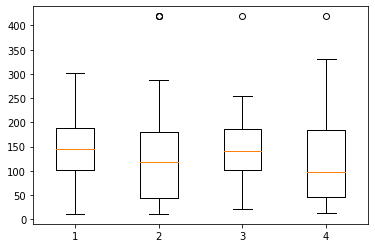

In [133]:
plt.boxplot([film_freq_index[filmname] for filmname in film_freq_index])

In [135]:
[np.mean(film_freq_index[filmname]) for filmname in film_freq_index]

[146.73464919265834,
 135.40591546696197,
 146.14913452560515,
 122.99415927987357]

In [136]:
[np.median(film_freq_index[filmname]) for filmname in film_freq_index]

[146.00952380952378, 119.0, 141.72727272727275, 96.5]

In [140]:
[len(t_raw[test_filmname]) for test_filmname in global_test_filmnames]

[47, 44, 47, 47]

In [145]:
{test_filmname:np.mean([len(ints) for ints in t_raw[test_filmname]]) for test_filmname in global_test_filmnames}

{'Bagman': 6.702127659574468,
 'Manos': 3.8863636363636362,
 'Road_To_Bali': 6.48936170212766,
 'The_Illusionist': 3.893617021276596}

In [138]:
t_raw

{'Bagman': [[],
  [6, 44, 109, 99],
  [43, 99, 15, 85],
  [6, 99, 99, 109, 6, 62],
  [38, 99, 38, 99, 44, 44, 44, 44, 109, 109, 108, 99, 44, 38, 99],
  [38, 38, 38, 99, 99, 99, 111, 111],
  [109, 99, 99],
  [108, 99, 6, 75, 19, 104, 69],
  [99, 54, 95, 4, 49, 97, 85, 99],
  [6, 53, 105, 99, 77],
  [6, 85, 99],
  [99, 33, 92],
  [50, 6, 111, 99],
  [33, 108, 6, 99, 69],
  [33, 6, 75, 6],
  [99, 59, 59, 59, 59, 59, 59],
  [105, 105, 19, 99, 44, 19, 19, 54, 99, 99, 99, 108],
  [38, 108, 99, 50, 19, 99, 53],
  [6, 33, 55, 50, 75, 6, 18],
  [108, 6, 99, 99, 15, 76, 3],
  [98, 99, 33, 38, 93, 31, 6, 115, 6, 99, 105, 44, 75],
  [99, 6, 92, 36, 102, 33],
  [33, 6, 63, 6, 99, 30, 105, 76, 66],
  [44, 65, 18, 19, 6, 99, 64, 3, 36, 108, 92, 99, 97, 44, 44],
  [18, 15, 99, 66, 15, 99, 75],
  [99, 38, 109, 104, 6, 99],
  [69, 99, 49, 6, 99],
  [109, 54, 111, 38, 105, 18, 64, 6, 99, 109],
  [92, 6, 99, 6, 3],
  [6, 33, 99, 19, 6, 99, 97, 36, 36, 109, 92, 18, 44, 99, 6, 99, 15, 99, 55],
  [6, 99, 99,

In [134]:
film_recalls

{'Bagman': 0.5342783424305163,
 'Manos': 0.4385105204872647,
 'Road_To_Bali': 0.44841269841269843,
 'The_Illusionist': 0.5046536796536797}

In [107]:
film_recalls

{'Bagman': 0.5342783424305163,
 'Manos': 0.4385105204872647,
 'Road_To_Bali': 0.44841269841269843,
 'The_Illusionist': 0.5046536796536797}

In [149]:
[0.16, 0.07, 0.023, 0.051]

[0.16, 0.07, 0.023, 0.051]

In [148]:
import scipy

In [151]:
scipy.stats.pearsonr([0.16, 0.07, 0.023, 0.051], [f1(0.3,0.13), f1(0.11,0.1), f1(0.034,0.012), f1(0.072,0.043)])

(0.9774474240437474, 0.022552575956252596)

In [146]:
def f1(pr, re):
    return 2*pr*re/(pr+re)

In [147]:
f1(0.3,0.13), f1(0.11,0.1), f1(0.034,0.012), f1(0.072,0.043)

(0.1813953488372093,
 0.10476190476190476,
 0.01773913043478261,
 0.053843478260869555)

>Does the problem lie in action recognition or entity recognition?

In order to answer this question, it is important to report recall@10 for the action recognition on the test movies:

{'Bagman': 0.5342783424305163,
 'Manos': 0.4385105204872647,
 'Road_To_Bali': 0.44841269841269843,
 'The_Illusionist': 0.5046536796536797}
 
Since these results are in line with the other metrics from Table 1, the test sample do not deviate from the validation in the sense of the action recognition complexity. Next, the Figure 6 demonstrates that for the both tracking algorithms there is an explicit positive correlation between the structural precision & recall depicted in (a,b) and interaction relevance (estimating both structural and interaction correctness simultaneously, i. e. involving action recognition results). For instance, the maximum value of interaction relevance was achieved on the 'Bagman' movie having maximum structural precision & recall. At the same time, the remaining part of the test movies demostrate exactly the same dynamics: deterioration of structural metrics lead to the deterioration of interaction relevance in all of the cases. In order to characterize this relation numericaly, we computed Pearson correlaction coefficient = 0.977 (between structural F1 and interaction relevance) and corresponding p-value = 0.02. As the coefficient is close to 1 and p-value is less than \alpha=0.05, there is enough evidence to claim that structural properties may influence the SGG quality dropdown as the correlaction between them exists. Thus, the current hypothesis regarding the considered problem is that the SGG performance can reach action recognition results (~0.4-0.5, reported at the beginning) if the entity recognition quality (involved in reconstuction of structural part) will be improved.

Finally, the structural part of scene graphs generation is supposed to be dependent on the chunk size paramter controlling the number of images aggregated in one input entry during the test. However, changes in this value did not cause significant deviations nor in structural metrics, neither in interaction relevance. Such an outcome refers again to the performance bottleneck induced by entity recognition as there are no more paramters involved.

>What are the mistakes the model makes? 

In the action recognition part, top-10 missed interactions are the following: 

['walk with', 'grabs', 'watches','reassures','gives to','leave together','shows','asks','yells at','scolds']

As it can be seen from the list, there are to groups of interactions: the general ones (that can be applied in most of the scenes where any charaters are presented: 'watches', 'asks', 'shows') or too specific to be inferred from the general context (e.g., 'leave together'). The nature of these errors reflects the mentioned issues with dataset annotation emhasized in the Data section and Figure 3.

For the entity recognition, the applied mobileFaceNet architecture is prone to confuse similar male faces (especially in ''The Illusionist'') as well as miss some characters due to the low quality of their reference images (e.g., ''Road_to_Bali'' and, partially, ''Manos''). The possible workarounds here are to replace the face recognition model and/or replace some part of the reference images.

> Why are the results worse on "Road" compared with "Illusionist"?

Despite the presence of multiple similar faces among the characters in 'Illustionist', it does not possess any low-quality reference images (the same is true true for 'Bagman' and 'Manos'). In contrast, the reference images of 'Road to Bali' are mostly limited by the ~100 pixels (~3-4 times smaller than for other movies) on the larger side and include various redundant details along with the faces of the characters.

In [108]:
sgg_results = dict()
for test_filmname in global_test_filmnames:
    film_results_str_re, film_results_str_pr, film_results_ints = [], [], []
    for s_idx in range(len(film_preds[test_filmname])):
        print('Film:', test_filmname, 'Scene:', s_idx)
        scene_ints_p = film_preds[test_filmname][s_idx]
        scene_chars_p = graphen_tr_ch[test_filmname ][s_idx]
        

        scene_ints_y = t_raw[test_filmname][s_idx]
        scene_chars_y = n_raw[test_filmname][s_idx]
        scene_chars_y = [[char[0].lower(), char[1].lower()] for char in scene_chars_y]

        print(scene_chars_p, '\n', scene_chars_y)
        
        tp_str, fp_str, tp_ints = 0, 0, 0
        for int_y, chars_y in zip(scene_ints_y, scene_chars_y):
            flag_int, flag_str = 0, 0
            for int_p, chars_p in zip(scene_ints_p, scene_chars_p):                
                if int_y in int_p and set(chars_p) == set(chars_y) and flag_int == 0:
                    tp_ints += 1
                    flag_int = 1
            for int_p, chars_p in zip(scene_ints_p, scene_chars_p):
                if set(chars_p) == set(chars_y) and flag_str == 0:
                    tp_str += 1
                    flag_str +=1
                else:
                    if len(chars_p) == 2 and set(chars_p) != set(chars_y):
                        fp_str+=1
                    
#        print('results', tp_both/(len(scene_ints_y) + 1e-10), '\n ____________')
        film_results_str_re.append(tp_str/(len(scene_ints_y) + 1e-10))
        film_results_str_pr.append(tp_str/(tp_str + fp_str + 1e-10))
        film_results_ints.append(tp_ints/(len(scene_ints_y) + 1e-10))
    sgg_results[test_filmname] = [np.mean(film_results_str_re),\
                                  np.mean(film_results_str_pr),\
                                  np.mean(film_results_ints)]

Film: Bagman Scene: 0
[[], ['jack'], ['jack'], ['jack'], ['jack'], ['jack'], ['jack'], ['jack'], ['jack'], ['jack'], ['jack'], ['jack']] 
 []
Film: Bagman Scene: 1
[[], ['susan'], ['susan', 'mr_sprague'], ['susan', 'mr_sprague']] 
 [['susan', 'mr. sprague'], ['susan', 'mr. sprague'], ['photographer', 'susan'], ['mr. sprague', 'susan']]
Film: Bagman Scene: 2
[['pam', 'jack'], ['mike', 'jack'], ['pam', 'mike'], ['pam', 'mike']] 
 [['jack', 'sarah'], ['jack', 'mike'], ['mike', 'jack'], ['mike', 'jack']]
Film: Bagman Scene: 3
[['jack', 'gus_boulis'], ['jack', 'gus_boulis'], ['jack'], ['senator_bob', 'jack'], ['jack', 'gus_boulis'], ['senator_bob', 'jack'], ['jack', 'gus_boulis'], ['jack', 'gus_boulis'], ['jack', 'gus_boulis'], ['jack', 'gus_boulis'], ['jack', 'gus_boulis']] 
 [['jack', 'agent patterson'], ['snake', 'jack'], ['agent patterson', 'jack'], ['jack', 'man in jail'], ['jack', 'snake'], ['jack', 'snake']]
Film: Bagman Scene: 4
[[], ['pam', 'gus_boulis'], ['grover'], ['jack', 'gus_

In [109]:
sgg_results


{'Bagman': [0.3235551029720945, 0.1744572916202799, 0.16912025699492098],
 'Manos': [0.25659271283679014, 0.1334413072163135, 0.11524170273880964],
 'Road_To_Bali': [0.11675168455276014,
  0.05696184319205058,
  0.07889976106327969],
 'The_Illusionist': [0.1138635596056949,
  0.060187236110927134,
  0.07212090509790904]}

In [49]:
sgg_results

{'Bagman': [0.3235551029720945, 0.1744572916202799, 0.16912025699492098],
 'Manos': [0.25659271283679014, 0.1334413072163135, 0.11524170273880964],
 'Road_To_Bali': [0.11675168455276014,
  0.05696184319205058,
  0.07889976106327969],
 'The_Illusionist': [0.1138635596056949,
  0.060187236110927134,
  0.07212090509790904]}

In [949]:
sgg_results

{'Bagman': [0.2992227910144453, 0.14937123259484092, 0.1467129703661617],
 'Manos': [0.14423701298249872, 0.10839491028200555, 0.06691017315796534],
 'Road_To_Bali': [0.03070504797609056,
  0.005820641262208728,
  0.020233625364757767],
 'The_Illusionist': [0.09706180344286489,
  0.06636184187406699,
  0.046588990205019845]}

VTA

In [736]:
sgg_results

{'Bagman': [0.2992227910144453, 0.1467129703661617],
 'Manos': [0.14423701298249872, 0.06691017315796534],
 'Road_To_Bali': [0.03070504797609056, 0.020233625364757767],
 'The_Illusionist': [0.09706180344286489, 0.046588990205019845]}

VT

In [725]:
sgg_results

{'Bagman': [0.2992227910144453, 0.1545143888057732],
 'Manos': [0.14423701298249872, 0.06691017315796534],
 'Road_To_Bali': [0.03070504797609056, 0.020233625364757767],
 'The_Illusionist': [0.09706180344286489, 0.04552516041783367]}

V

In [716]:
sgg_results

{'Bagman': [0.2992227910144453, 0.13537167386275362],
 'Manos': [0.14423701298249872, 0.05798160172958233],
 'Road_To_Bali': [0.03070504797609056, 0.020233625364757767],
 'The_Illusionist': [0.09706180344286489, 0.048564674095601806]}

In [348]:
sgg_results

{'Bagman': [0.2992227910144453, 0.12482313940622851],
 'Manos': [0.14423701298249872, 0.07259199133935737],
 'Road_To_Bali': [0.03070504797609056, 0.01668752607403673],
 'The_Illusionist': [0.09706180344286489, 0.02759202971914001]}

In [341]:
sgg_results

{'Bagman': [0.2992227910144453, 0.11584590909656564],
 'Manos': [0.14423701298249872, 0.05798160172958233],
 'Road_To_Bali': [0.03070504797609056, 0.01668752607403673],
 'The_Illusionist': [0.09706180344286489, 0.02227288078310278]}

## Queries

In [ ]:
# !pip install xmltodict

In [366]:
import json

A note about notation:

1. Question 1 -- Which **unique scene** contains the following **interactions**?
2. Question 2 -- Which **person** in the **specified scene** has the following **interactions** with other **persons** in **the same scene**?
3. Question 3 -- In **specified scene**, **Person 1** **interaction** **Person 2**. What is the **immediate next / following interation** between **Person 1** and **Person 2**, in **another specified scene** (it can be the same)?
4. Question 4 -- In **specified scene**, **Person 1** **interaction** **Person 2**. What is the **immediate prior / previous interation** between **Person 1** and **Person 2**, in **another specified scene** (it can be the same)?
5. Question 5 -- Match the **textual description** of the scene with the **corresponding scene number**.
6. Question 6 -- What is the **correct sentiment label** in the **specified scene**?

### Preprocessing 

In [79]:
import xmltodict

In [80]:
quieries_folder = '../DVUChallenge/dev_dataset/scenes_knowledge_graphs/2021.testing.queries.groundTruth/'

In [81]:
parsed_queries, parsed_answers = dict(), dict()

for test_filmname in tqdm(global_test_filmnames):
    with open(f'{quieries_folder + test_filmname}/{test_filmname}.Scene_Level.xml', 'r') as f:
        data = xmltodict.parse(f.read())
        parsed_queries[test_filmname] = data['DeepVideoUnderstandingSceneQueries']['DeepVideoUnderstandingTopicQuery']
    
    with open(f'{quieries_folder + test_filmname}/{test_filmname}_Answers.txt', 'r') as f:
        data = f.read().split('\n\n')
        parsed_answers[test_filmname] = data

100%|██████████| 4/4 [00:00<00:00, 52.21it/s]


In [82]:
def quiery_parsing(query):
    query_body = dict()
    
    if query['@question'] == '1':
        query_body['q_type'] = int(query['@question'])
        query_body['description'] = query['item'][-1]['@description']
        query_body['interaction_list'] = [entry['@predicate'].split(':')[-1] for entry in query['item'] if '@predicate' in entry]
        return query_body
    
    if query['@question'] == '2':
        query_body['q_type'] = int(query['@question'])
        query_body['scene'] = int(query['item'][0]['@scene'])
        query_body['description'] = query['item'][-1]['@description']
        query_body['interaction_list'] = [entry['@predicate'].split(':')[-1] for entry in query['item'] if '@predicate' in entry]
        query_body['object_list'] = [entry['@object'].split(':')[-1] for entry in query['item'] if '@object' in entry]
        return query_body
    
    if query['@question'] == '3' or query['@question'] == '4':
        query_body['q_type'] = int(query['@question'])
        query_body['scene'] = int(query['item'][0]['@scene'])
        query_body['description'] = query['item'][1]['@description']
        
        query_body['subject'] = query['item'][0]['@subject']
        query_body['object'] = query['item'][0]['@object']
        query_body['predicate'] = query['item'][0]['@object']
        
        query_body['target_scene'] = int(query['Answers']['item'][0]['@scene'])
        query_body['answers'] = [entry['@answer'] for entry in query['Answers']['item']]
        return query_body
    
    if query['@question'] == '5':
        query_body['q_type'] = int(query['@question'])
        query_body['scene_description'] = query['item'][1]['@description']
        query_body['answers'] = [int(entry['@answer']) for entry in query['Answers']['item']]
        return query_body
        
    if query['@question'] == '6':
        query_body['q_type'] = int(query['@question'])
        query_body['scene'] = int(query['item'][0]['@scene'])
        query_body['description'] = query['item'][1]['@description']
        query_body['answers'] = [entry['@answer'] for entry in query['Answers']['item']]
        return query_body

In [83]:
for filmname in tqdm(global_test_filmnames):
    for i in range(len(parsed_queries[filmname])):
        parsed_queries[filmname][i] = quiery_parsing(parsed_queries[filmname][i])

100%|██████████| 4/4 [00:00<00:00, 5329.48it/s]


In [84]:
for filmname in parsed_answers:
    parsed_answers[filmname] = [entry.split('\n') for entry in parsed_answers[filmname]]

In [85]:
for filmname in tqdm(global_test_filmnames):
    for i in range(len(parsed_queries[filmname])):
        if parsed_queries[filmname][i]['q_type'] == 1:
            parsed_answers[filmname][i] = int(parsed_answers[filmname][i][0].split(' ')[-1])
        if parsed_queries[filmname][i]['q_type'] == 2:
            parsed_answers[filmname][i] = parsed_answers[filmname][i][1].split(' ')[-1]
        if parsed_queries[filmname][i]['q_type'] == 3:
            parsed_answers[filmname][i] = parsed_answers[filmname][i][1].split(':')[2].replace('Source', '').strip()
        if parsed_queries[filmname][i]['q_type'] == 4:
            parsed_answers[filmname][i] = parsed_answers[filmname][i][1].split(':')[2].replace('Source', '').strip()
        if parsed_queries[filmname][i]['q_type'] == 5:
            parsed_answers[filmname][i] = parsed_answers[filmname][i][0]
        if parsed_queries[filmname][i]['q_type'] == 6:
            parsed_answers[filmname][i] = parsed_answers[filmname][i][0]

100%|██████████| 4/4 [00:00<00:00, 14217.98it/s]


In [86]:
parsed_queries['Bagman'][25]

{'q_type': 5,
 'scene_description': 'Jack gives a speech and introduces Tom DeLay to the stage. Then he hands a check to Senator Jarvis and the Senator thanks him. Jack approaches Grover who complains to him about having to socialize with Chief Poncho who is currently talking to Pam at another table. Jack attempts to appease Grover and negotiate with him. Grover asks where Mike is, as he was supposed to take over for him hours ago.',
 'answers': [3, 8, 13, 19, 24, 28, 33, 37, 41, 43]}

In [87]:
parsed_answers['Bagman'][25]

'28'

### Query answering

In [603]:
film_preds['Bagman'][30]

[[99, 6, 1, 38, 84],
 [6, 44, 99, 65, 0],
 [99, 66, 44, 92, 1],
 [55, 99, 4, 38, 6],
 [99, 35, 44, 6, 62],
 [99, 44, 6, 65, 0]]

In [624]:
n_raw['Bagman'][30]

[('Mike', 'Kevin'),
 ('Bill', 'Kevin'),
 ('Kevin', 'Bill'),
 ('Enid', 'Kevin'),
 ('Kevin', 'Mike'),
 ('Jack', 'Kevin'),
 ('Jack', 'Kevin'),
 ('Manny', 'Jack'),
 ('Jack', 'Enid')]

In [606]:
evg_tr_ch['Bagman'][30]

[['bill'], ['bill'], ['ralph', 'gus_boulis'], ['bill'], ['bill'], ['bill']]

In [626]:
graphen_tr_ch['Bagman'][30]

[['bill', 'adam'],
 ['bill', 'adam'],
 ['ralph', 'mike'],
 ['mike', 'jack'],
 ['mike', 'jack'],
 ['mike', 'jack']]

In [88]:
def augmented_argmax(x, top_n):
    x = np.array(x)
    idx = np.arange(x.size)
    return idx[np.argsort(x[idx])][-top_n:][::-1]

In [91]:
from collections import Counter

In [92]:
results = dict()

tracking_data = evg_tr_ch

for test_filmname in global_test_filmnames:

#    test_filmname = 'Bagman'

    results[test_filmname] = {1:[], 2:[], 3:[], 4:[], 5:[], 6:[]}

    for query, answer in zip(parsed_queries[test_filmname], parsed_answers[test_filmname]):
        if query['q_type'] == 1:
            reference_ints = set([inter_2_label[interaction] for interaction in query['interaction_list']])
            pred_ints = [set([interaction for chunk_ints in scene_ints for interaction in chunk_ints[:3]]) for scene_ints in film_preds[test_filmname]]
            scores = [len(reference_ints.intersection(pred_ints[i])) for i in range(len(pred_ints))]
    #        print(augmented_argmax(scores, len(scores)))
            reciprocal_rank = 1/((augmented_argmax(scores, len(scores)) + 1).tolist().index(answer) + 1)
            print('Q1 MRR:', reciprocal_rank)
            results[test_filmname][1].append(reciprocal_rank)
        if query['q_type'] == 2:
            scene_idx = query['scene']
            interactions, persons = query['interaction_list'], [entry.lower() for entry in query['object_list']]
            tracking_results = tracking_data[test_filmname][scene_idx+1]
            candidates = [tracking_results[i] for i in range(len(tracking_results))\
                          if len(set(tracking_results[i]).intersection(set(persons))) > 0 and\
                          len(tracking_results[i]) == 2]
#            print(persons)
            
            result = [candidate[0] if candidate[1] in set(persons) else candidate[1] for candidate in candidates]
            result = [entry[0] for entry in Counter(result).most_common()]
            
#            print(result, answer)
            
            if answer.lower() in result:
                reciprocal_rank = 1/(result.index(answer.lower()) + 1)
            else:
                reciprocal_rank = 0
            results[test_filmname][2].append(reciprocal_rank)
            print('Q2 MRR:', reciprocal_rank)
#            print(persons, tracking_results)
        
        if query['q_type'] == 5:
            pass
        
        if query['q_type'] == 6:
            pass

Q1 MRR: 0.023809523809523808
Q1 MRR: 0.037037037037037035
Q1 MRR: 0.05
Q1 MRR: 0.03333333333333333
Q2 MRR: 0
Q2 MRR: 0
Q2 MRR: 0
Q2 MRR: 1.0
Q1 MRR: 0.07692307692307693
Q1 MRR: 0.07692307692307693
Q1 MRR: 0.05555555555555555
Q1 MRR: 0.3333333333333333
Q2 MRR: 1.0
Q2 MRR: 0
Q2 MRR: 0
Q2 MRR: 0
Q1 MRR: 0.16666666666666666
Q1 MRR: 0.05555555555555555
Q1 MRR: 0.030303030303030304
Q1 MRR: 0.125
Q2 MRR: 0
Q2 MRR: 0
Q2 MRR: 1.0
Q2 MRR: 0
Q1 MRR: 0.030303030303030304
Q1 MRR: 0.09090909090909091
Q1 MRR: 0.125
Q1 MRR: 0.025
Q2 MRR: 0
Q2 MRR: 0
Q2 MRR: 0
Q2 MRR: 0


In [93]:
### from collections import Counter

In [94]:
Counter(['gus_boulis', 'gus_boulis', 'test', 'r', 'test', 'gus_boulis']).most_common()

[('gus_boulis', 3), ('test', 2), ('r', 1)]

In [95]:
for test_filmname in global_test_filmnames:
    results[test_filmname][1] = np.mean(results[test_filmname][1])
    results[test_filmname][2] = np.mean(results[test_filmname][2])
results

{'Bagman': {1: 0.036044973544973546, 2: 0.25, 3: [], 4: [], 5: [], 6: []},
 'Manos': {1: 0.13568376068376067, 2: 0.25, 3: [], 4: [], 5: [], 6: []},
 'Road_To_Bali': {1: 0.09438131313131312, 2: 0.25, 3: [], 4: [], 5: [], 6: []},
 'The_Illusionist': {1: 0.06780303030303031,
  2: 0.0,
  3: [],
  4: [],
  5: [],
  6: []}}

In [756]:
for test_filmname in global_test_filmnames:
    results[test_filmname][1] = np.mean(results[test_filmname][1])
    results[test_filmname][2] = np.mean(results[test_filmname][2])
results

{'Bagman': {1: 0.06273436708219317, 2: 0.25, 3: [], 4: [], 5: [], 6: []},
 'Manos': {1: 0.1599832915622389, 2: 0.25, 3: [], 4: [], 5: [], 6: []},
 'Road_To_Bali': {1: 0.09880252849002849, 2: 0.25, 3: [], 4: [], 5: [], 6: []},
 'The_Illusionist': {1: 0.28520299145299144,
  2: 0.0,
  3: [],
  4: [],
  5: [],
  6: []}}

In [ ]:
for test_filmname in global_test_filmnames:
    test_

In [760]:
(0.06273436708219317 + 0.15 + 0.09 + 0.285 + 0.25 + 0.25+ 0.25 + 0)/8

0.16721679588527413

In [593]:
 parsed_queries['Bagman'][0]['interaction_list']

['gives to', 'talks to', 'watches', 'watches', 'touches', 'asks', 'talks to']

In [591]:
[inter_2_label[interaction] for interaction in parsed_queries['Bagman'][0]['interaction_list']]

[38, 99, 109, 109, 104, 6, 99]

In [588]:
parsed_answers['Bagman'][0]

26

In [594]:
t_raw['Bagman'][25]

[99, 38, 109, 104, 6, 99]

In [596]:
augmented_argmax(scores, len(scores)) + 1

array([24,  4, 21, 46, 13, 30,  7, 34,  5, 33, 38, 42,  2, 43, 39, 18, 41,
       40,  8,  9, 19, 11, 12,  3, 14, 15,  6, 10, 47, 20, 28, 45, 44, 36,
       35, 32, 31, 29, 25,  1, 17, 27, 26, 23, 37, 22, 16])

In [571]:
1/augmented_argmax(scores, len(scores)).tolist().index(26)

0.02564102564102564

In [583]:
quiery_parsing(parsed_queries['Bagman'][30])

IndexError: list index out of range

In [464]:
parsed_queries['Bagman'][23]

{'@question': '5',
 '@id': '8',
 'item': [{'@subject': 'Scene:Unknown', '@predicate': 'Description'},
  {'@description': 'While Jack plays the piano late at night, his wife, Pam comes downstairs and sits with him. He puts his arm around Pam and she asks him what he is doing still up this late since the kids have gone to sleep. The two reminisce on their past.'}],
 'Answers': {'item': [{'@type': 'Integer:Scene', '@answer': '3'},
   {'@type': 'Integer:Scene', '@answer': '8'},
   {'@type': 'Integer:Scene', '@answer': '13'},
   {'@type': 'Integer:Scene', '@answer': '19'},
   {'@type': 'Integer:Scene', '@answer': '24'},
   {'@type': 'Integer:Scene', '@answer': '28'},
   {'@type': 'Integer:Scene', '@answer': '33'},
   {'@type': 'Integer:Scene', '@answer': '37'},
   {'@type': 'Integer:Scene', '@answer': '41'},
   {'@type': 'Integer:Scene', '@answer': '43'}]}}

In [451]:
quiery_parsing(parsed_queries[test_filmname][5])

{'q_type': 2,
 'scene': 18,
 'description': 'Which Person in scene 18 has the following  Interactions: introduces Target_Person:Eisenheim, whispers to Target_Person:Eisenheim',
 'interaction_list': ['introduces', 'whispers to'],
 'object_list': ['Eisenheim', 'Eisenheim']}

In [435]:
quiery_parsing(parsed_queries[test_filmname][19])

In [436]:
parsed_queries[test_filmname][19]

{'@question': '5',
 '@id': '4',
 'item': [{'@subject': 'Scene:Unknown', '@predicate': 'Description'},
  {'@description': 'Sophie arrives at the mansion and Loschek leads her to a room to wait for Prince_Leopold. Sophie and the prince get into a fight and he slaps her across the face. Sophie runs out and Loschek watches as the prince follows her to the stable. Sophie manages to escape.'}],
 'Answers': {'item': [{'@type': 'Integer:Scene', '@answer': '3'},
   {'@type': 'Integer:Scene', '@answer': '7'},
   {'@type': 'Integer:Scene', '@answer': '12'},
   {'@type': 'Integer:Scene', '@answer': '18'},
   {'@type': 'Integer:Scene', '@answer': '24'},
   {'@type': 'Integer:Scene', '@answer': '28'},
   {'@type': 'Integer:Scene', '@answer': '32'},
   {'@type': 'Integer:Scene', '@answer': '36'},
   {'@type': 'Integer:Scene', '@answer': '40'},
   {'@type': 'Integer:Scene', '@answer': '43'}]}}

In [420]:
%debug

> /tmp/ipykernel_28240/448720590.py(28)<listcomp>()
     25         query_body['predicate'] = query['item'][0]['@object']
     26 
     27         query_body['target_scene'] = query['Answers']['item'][0]['@scene']
---> 28         query_body['answers'] = [entry['@answer'] for entry in query['Answers']['item'][1]]
     29         return query_body

ipdb> query['Answers']['item'][1]
*** NameError: name 'query' is not defined
ipdb> entry
'@type'
ipdb> exit


In [ ]:
'The_Illusionist.Scene_Level.xml'